# Analyzing Cryptocurrency Prices Using Google Trends

## Preparing Data 

In [1]:
import pandas as pd
from pandas import ExcelWriter
%matplotlib inline

In [2]:
from datetime import datetime 
import time 


# Note about Google Trends data: It seems like when I pass in several keywords, they all get ranked in regards to each other.
# Thus, when I have bitcoin as the first keyword, all the other keywords ranks are made smaller significantly 
# Solution: get google trends data seprately for each keyword I want
# Get the Trend data again for hourly! 


btc_df = pd.read_csv('../data/BTC/BTC_2012-2018_1min.csv')
btc_df["Date(UTC)"] = pd.to_datetime(btc_df["Timestamp"], utc=True,unit='s')

# TODO: Change this file to a one that only gets trend just for keyword Bitcoin
google_trends_df = pd.read_csv('C:/Users/Shoya/surf/data/CryptoGoogleTrends_v2.csv', encoding='latin1')
google_trends_df["date"] = pd.to_datetime(google_trends_df["date"])
google_trends_df['Date_UTC_trend'] = google_trends_df['date'].dt.tz_localize('EST').dt.tz_convert('UTC')
google_trends_df["Timestamp"] = [time.mktime(t.timetuple()) for t in google_trends_df.Date_UTC_trend]

google_trends_bitcoin_historical_df = pd.read_csv('C:/Users/Shoya/surf/data/CryptoGoogleTrendsHistoricalDaily_Bitcoin.csv', encoding='latin1')
google_trends_bitcoin_historical_df["date"] = pd.to_datetime(google_trends_bitcoin_historical_df["date"])
google_trends_bitcoin_historical_df["Timestamp"] = [time.mktime(t.timetuple()) for t in google_trends_bitcoin_historical_df.date]
        
display(google_trends_bitcoin_historical_df.head())
display(btc_df.head())
display(btc_df.tail())
display(google_trends_df.head())

date  Bitcoin  isPartial     Timestamp
0 2015-01-04        2      False  1.420348e+09
1 2015-01-11        3      False  1.420952e+09
2 2015-01-18        2      False  1.421557e+09
3 2015-01-25        2      False  1.422162e+09
4 2015-02-01        2      False  1.422767e+09

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980  4.39  4.39  4.39   4.39      0.455581                2.0   
2  1325318040  4.39  4.39  4.39   4.39      0.455581                2.0   
3  1325318100  4.39  4.39  4.39   4.39      0.455581                2.0   
4  1325318160  4.39  4.39  4.39   4.39      0.455581                2.0   

   Weighted_Price           Date(UTC)  
0            4.39 2011-12-31 07:52:00  
1            4.39 2011-12-31 07:53:00  
2            4.39 2011-12-31 07:54:00  
3            4.39 2011-12-31 07:55:00  
4            4.39 2011-12-31 07:56:00

Timestamp     Open     High      Low    Close  Volume_(BTC)  \
3273372  1522108560  8159.21  8159.39  8153.62  8153.68      0.663192   
3273373  1522108620  8159.38  8163.72  8152.81  8155.00      3.720024   
3273374  1522108680  8157.47  8158.60  8130.01  8130.01     27.294436   
3273375  1522108740  8145.17  8149.66  8130.01  8149.66     23.065281   
3273376  1522108800  8152.26  8164.68  8151.37  8153.04     17.758130   

         Volume_(Currency)  Weighted_Price           Date(UTC)  
3273372        5408.215377     8154.826880 2018-03-26 23:56:00  
3273373       30333.753144     8154.182788 2018-03-26 23:57:00  
3273374      222388.761970     8147.769162 2018-03-26 23:58:00  
3273375      187570.784940     8132.169837 2018-03-26 23:59:00  
3273376      144820.147410     8155.146220 2018-03-27 00:00:00

date  Bitcoin  Ethereum  Bitstamp  Buy Bitcoin  Coinbase  \
0 2015-01-06 00:00:00       79         1         7            2         2   
1 2015-01-06 01:00:00       63         1         6            2         2   
2 2015-01-06 02:00:00       67         1         5            2         2   
3 2015-01-06 03:00:00       57         0         5            1         1   
4 2015-01-06 04:00:00       56         1         6            2         2   

   isPartial            Date_UTC_trend     Timestamp  
0      False 2015-01-06 05:00:00+00:00  1.420538e+09  
1      False 2015-01-06 06:00:00+00:00  1.420542e+09  
2      False 2015-01-06 07:00:00+00:00  1.420546e+09  
3      False 2015-01-06 08:00:00+00:00  1.420549e+09  
4      False 2015-01-06 09:00:00+00:00  1.420553e+09

In [3]:
# Adjust Bitcoin Trend Using Historical Overall Values
def weigh_using_historical_data(row, historical_df):    
    #display('row: ', row)
    #display(historical_df)
    #in_range_df = historical_df[ (historical_df['Timestamp'] < row['Timestamp']) & (historical_df['Timestamp'] >= row['Timestamp'] + 604800 ) # 1 week = 604800 seconds 
    try:
        before_timestamp_df = historical_df[ historical_df['Timestamp'] <= row['Timestamp'] ] 
        after_timestamp_df = historical_df[ historical_df['Timestamp'] >= row['Timestamp'] ] 
        #display(before_timestamp_df)
        #display(after_timestamp_df)
        scaler = (before_timestamp_df['Bitcoin'].iloc[-1] + after_timestamp_df['Bitcoin'].iloc[0] ) / 2 
        #display('row: ' + str(row['date']) + ' ' + str(scaler) ) 
        return row['Bitcoin'] * scaler 
    except:
        return None 
      
google_trends_df["Bitcoin (Adj.)"] = google_trends_df.apply(lambda row: weigh_using_historical_data(row, google_trends_bitcoin_historical_df), axis=1)


In [102]:
# Adjust Bitcoin Trend Using Overlap Data
google_trends_overlap_df = pd.read_csv('C:/Users/Shoya/surf/data/CryptoGoogleTrends_with_overlap.csv', encoding='latin1')
google_trends_overlap_df["date"] = pd.to_datetime(google_trends_overlap_df["date"])
google_trends_overlap_df['Date_UTC_trend'] = google_trends_overlap_df['date'].dt.tz_localize('EST').dt.tz_convert('UTC')
google_trends_overlap_df["Timestamp"] = [time.mktime(t.timetuple()) for t in google_trends_overlap_df.Date_UTC_trend]
google_trends_overlap_df = google_trends_overlap_df[google_trends_overlap_df['Bitcoin'] != 0 ]
google_trends_overlap_df['Bitcoin (Unadj.)'] = google_trends_overlap_df['Bitcoin']

def weigh_using_overlap(row, overlap_df, duplicate_df, ratios):
    if ( (row['Timestamp'] < duplicate_df['Timestamp'].iloc[0])): #or (row['Timestamp'] > duplicate_df['Timestamp'].iloc[-1])): 
        # edge case for first week and last week!? 
        return row['Bitcoin']
    else:
        try: 
            row_index = int(row.name) 
            if (row['Timestamp'] == overlap_df['Timestamp'].loc[row_index+24] ):
                # first occurence of the duplicate     
                duplicate_truncated_df = duplicate_df[duplicate_df['Timestamp'] <= row['Timestamp'] - 86400 ]
                if (len(duplicate_truncated_df) == 0 ): 
                    # very first duplicate, return as is 
                    return row['Bitcoin']
            else:
                duplicate_truncated_df = duplicate_df[duplicate_df['Timestamp'] <= row['Timestamp']]
            ratio = float(duplicate_truncated_df.iloc[-2]['Bitcoin']) / float(duplicate_truncated_df.iloc[-1]['Bitcoin'])
            if (len(ratios) == 0):
                # first row 
                ratios.append(ratio)
            if ( len( duplicate_truncated_df) < 2 ):
                # first week edge case
                return row['Bitcoin'] 
            if ( (row['Timestamp'] == duplicate_truncated_df.iloc[-1]['Timestamp']) and (ratio != ratios[-1])  ):
                # ratio just changed 
                ratios.append(ratio*ratios[-1])
                #print('previous ratio: ', ratios[-2])
                #print('result ratio: ', ratios[-1] )
                return row['Bitcoin'] * ratios[-1]
            else:
                #print('using ratio: ', ratios[-1] )
                return row['Bitcoin'] * ratios[-1]
        except Exception as e:
            #display(e)
            
            # TODO: Address the problem of rows with value of 0
            
            return None
                
occurence_duplicates = google_trends_overlap_df[google_trends_overlap_df.duplicated(['Timestamp'], keep=False)]
occurence_duplicates = occurence_duplicates[occurence_duplicates['date'].dt.hour == 0 ]

ratios = []
google_trends_overlap_df["Bitcoin"] = google_trends_overlap_df.apply(lambda row: weigh_using_overlap(row, google_trends_overlap_df, occurence_duplicates, ratios), axis=1)
google_trends_overlap_df.drop_duplicates(subset='date',keep='last',inplace=True)
google_trends_overlap_df = google_trends_overlap_df.rename(columns = {'Bitcoin':'Bitcoin (Adj.Overlap)'})


# display(google_trends_overlap_df.head())

In [100]:
# writer = pd.ExcelWriter("CryptoGoogleTrends_with_overlap_adjusted.xlsx",  engine='xlsxwriter', options={'remove_timezone': True})
# google_trends_overlap_df.to_excel(writer)
# writer.save()

## Data Visualization

Timestamp    Open    High     Low   Close  Volume_(BTC)  \
0  1420840800  289.59  289.94  289.13  289.13     34.042422   
1  1420844400  293.61  293.61  292.15  292.15     36.628012   

   Volume_(Currency)  Weighted_Price           Date(UTC)                date  \
0        9854.490388      289.476771 2015-01-09 22:00:00 2015-01-09 12:00:00   
1       10733.474257      293.040042 2015-01-09 23:00:00 2015-01-09 13:00:00   

   Bitcoin (Adj.Overlap)  isPartial            Date_UTC_trend  \
0                   40.0      False 2015-01-09 17:00:00+00:00   
1                   41.0      False 2015-01-09 18:00:00+00:00   

   Bitcoin (Unadj.)  Close Price % Change  Close Price % Change (Abs)  
0                40                   NaN                         NaN  
1                41              0.010445                    0.010445

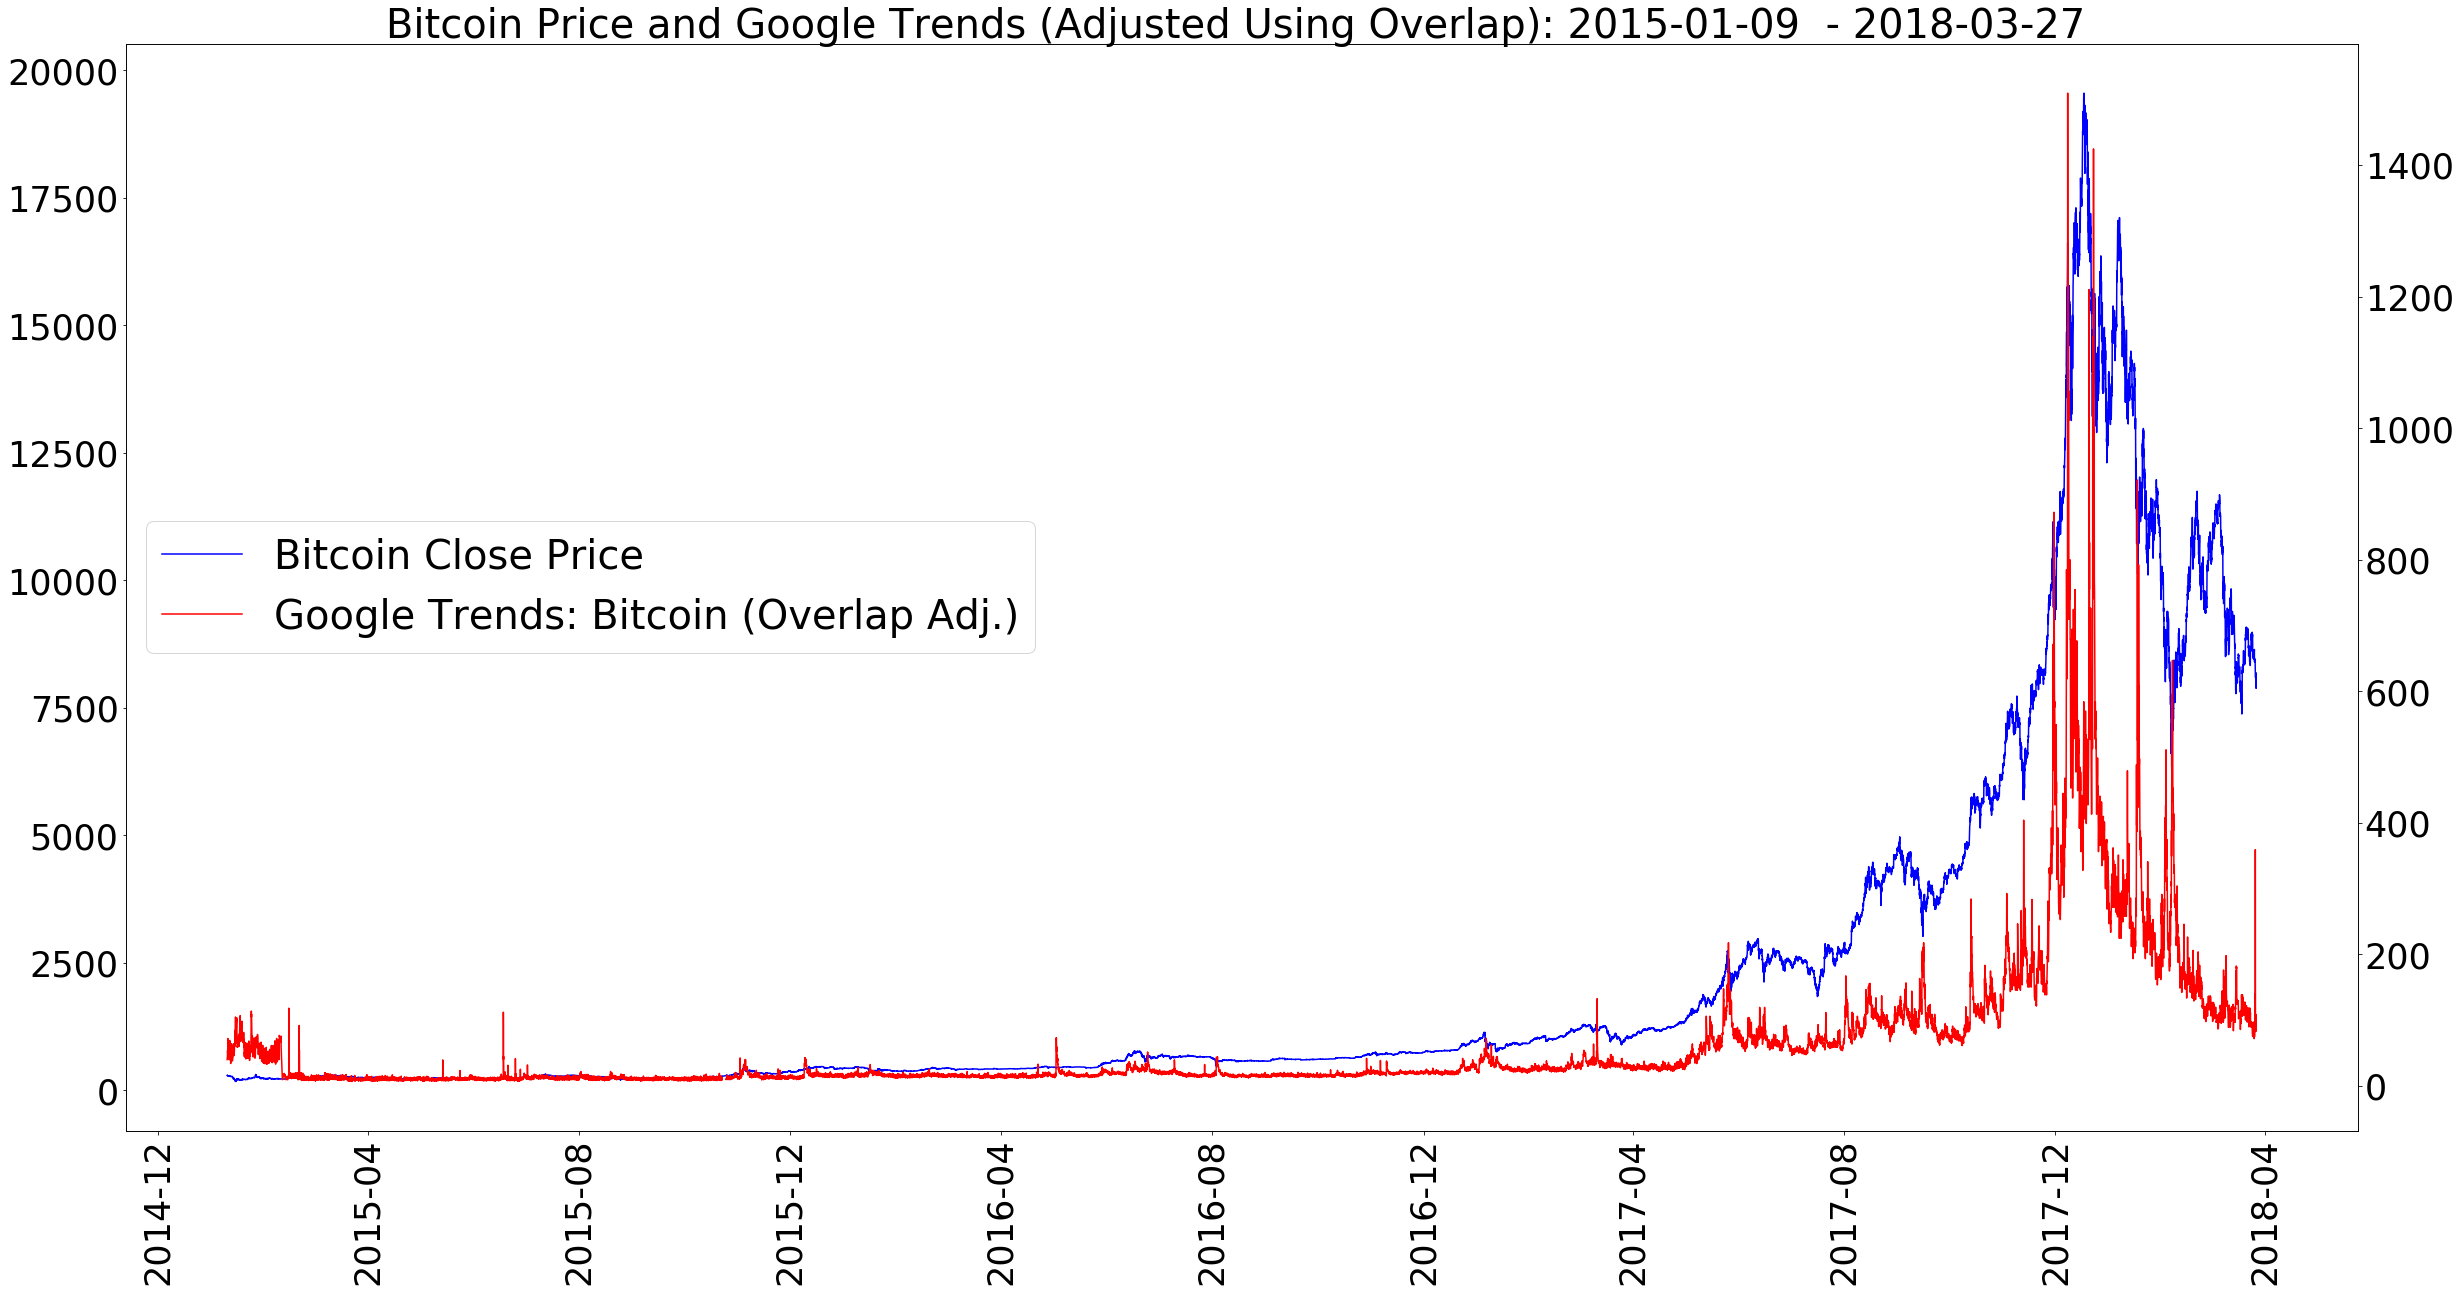

In [104]:
import matplotlib.pyplot as plt

btc_and_trends_df_hourly_overlap = pd.merge(left=btc_df, left_on="Timestamp", right=google_trends_overlap_df, right_on="Timestamp")
btc_and_trends_df_hourly_overlap["Close Price % Change"] = btc_and_trends_df_hourly_overlap["Close"].pct_change()
btc_and_trends_df_hourly_overlap["Close Price % Change (Abs)"] = abs(btc_and_trends_df_hourly_overlap["Close Price % Change"])

display(btc_and_trends_df_hourly_overlap.head(2))

fig_bitcoin_overlap, ax_bitcoin_overlap = plt.subplots(figsize=(40,20)) 
l1, = ax_bitcoin_overlap.plot(btc_and_trends_df_hourly_overlap["Date(UTC)"], btc_and_trends_df_hourly_overlap["Close"], color='blue')
ax_bitcoin_overlap_2 = ax_bitcoin_overlap.twinx() 
l2, = ax_bitcoin_overlap_2.plot(btc_and_trends_df_hourly_overlap["Date(UTC)"], btc_and_trends_df_hourly_overlap["Bitcoin (Adj.Overlap)"], color='red' )
ax_bitcoin_overlap.set_title('Bitcoin Price and Google Trends (Adjusted Using Overlap): ' + str(btc_and_trends_df_hourly_overlap["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(btc_and_trends_df_hourly_overlap["Date(UTC)"].iloc[-1])[:-8], fontsize=40 )
for tick in ax_bitcoin_overlap.get_xticklabels():
    tick.set_rotation(90)

plt.rcParams.update({'font.size': 35})
plt.legend([l1, l2],["Bitcoin Close Price", "Google Trends: Bitcoin (Overlap Adj.)" ], loc=6, fontsize=40)
plt.show();



In [105]:
# writer = pd.ExcelWriter("btc_and_trends_df_hourly_overlap.xlsx",  engine='xlsxwriter', options={'remove_timezone': True})
# btc_and_trends_df_hourly_overlap.to_excel(writer)
# writer.save()

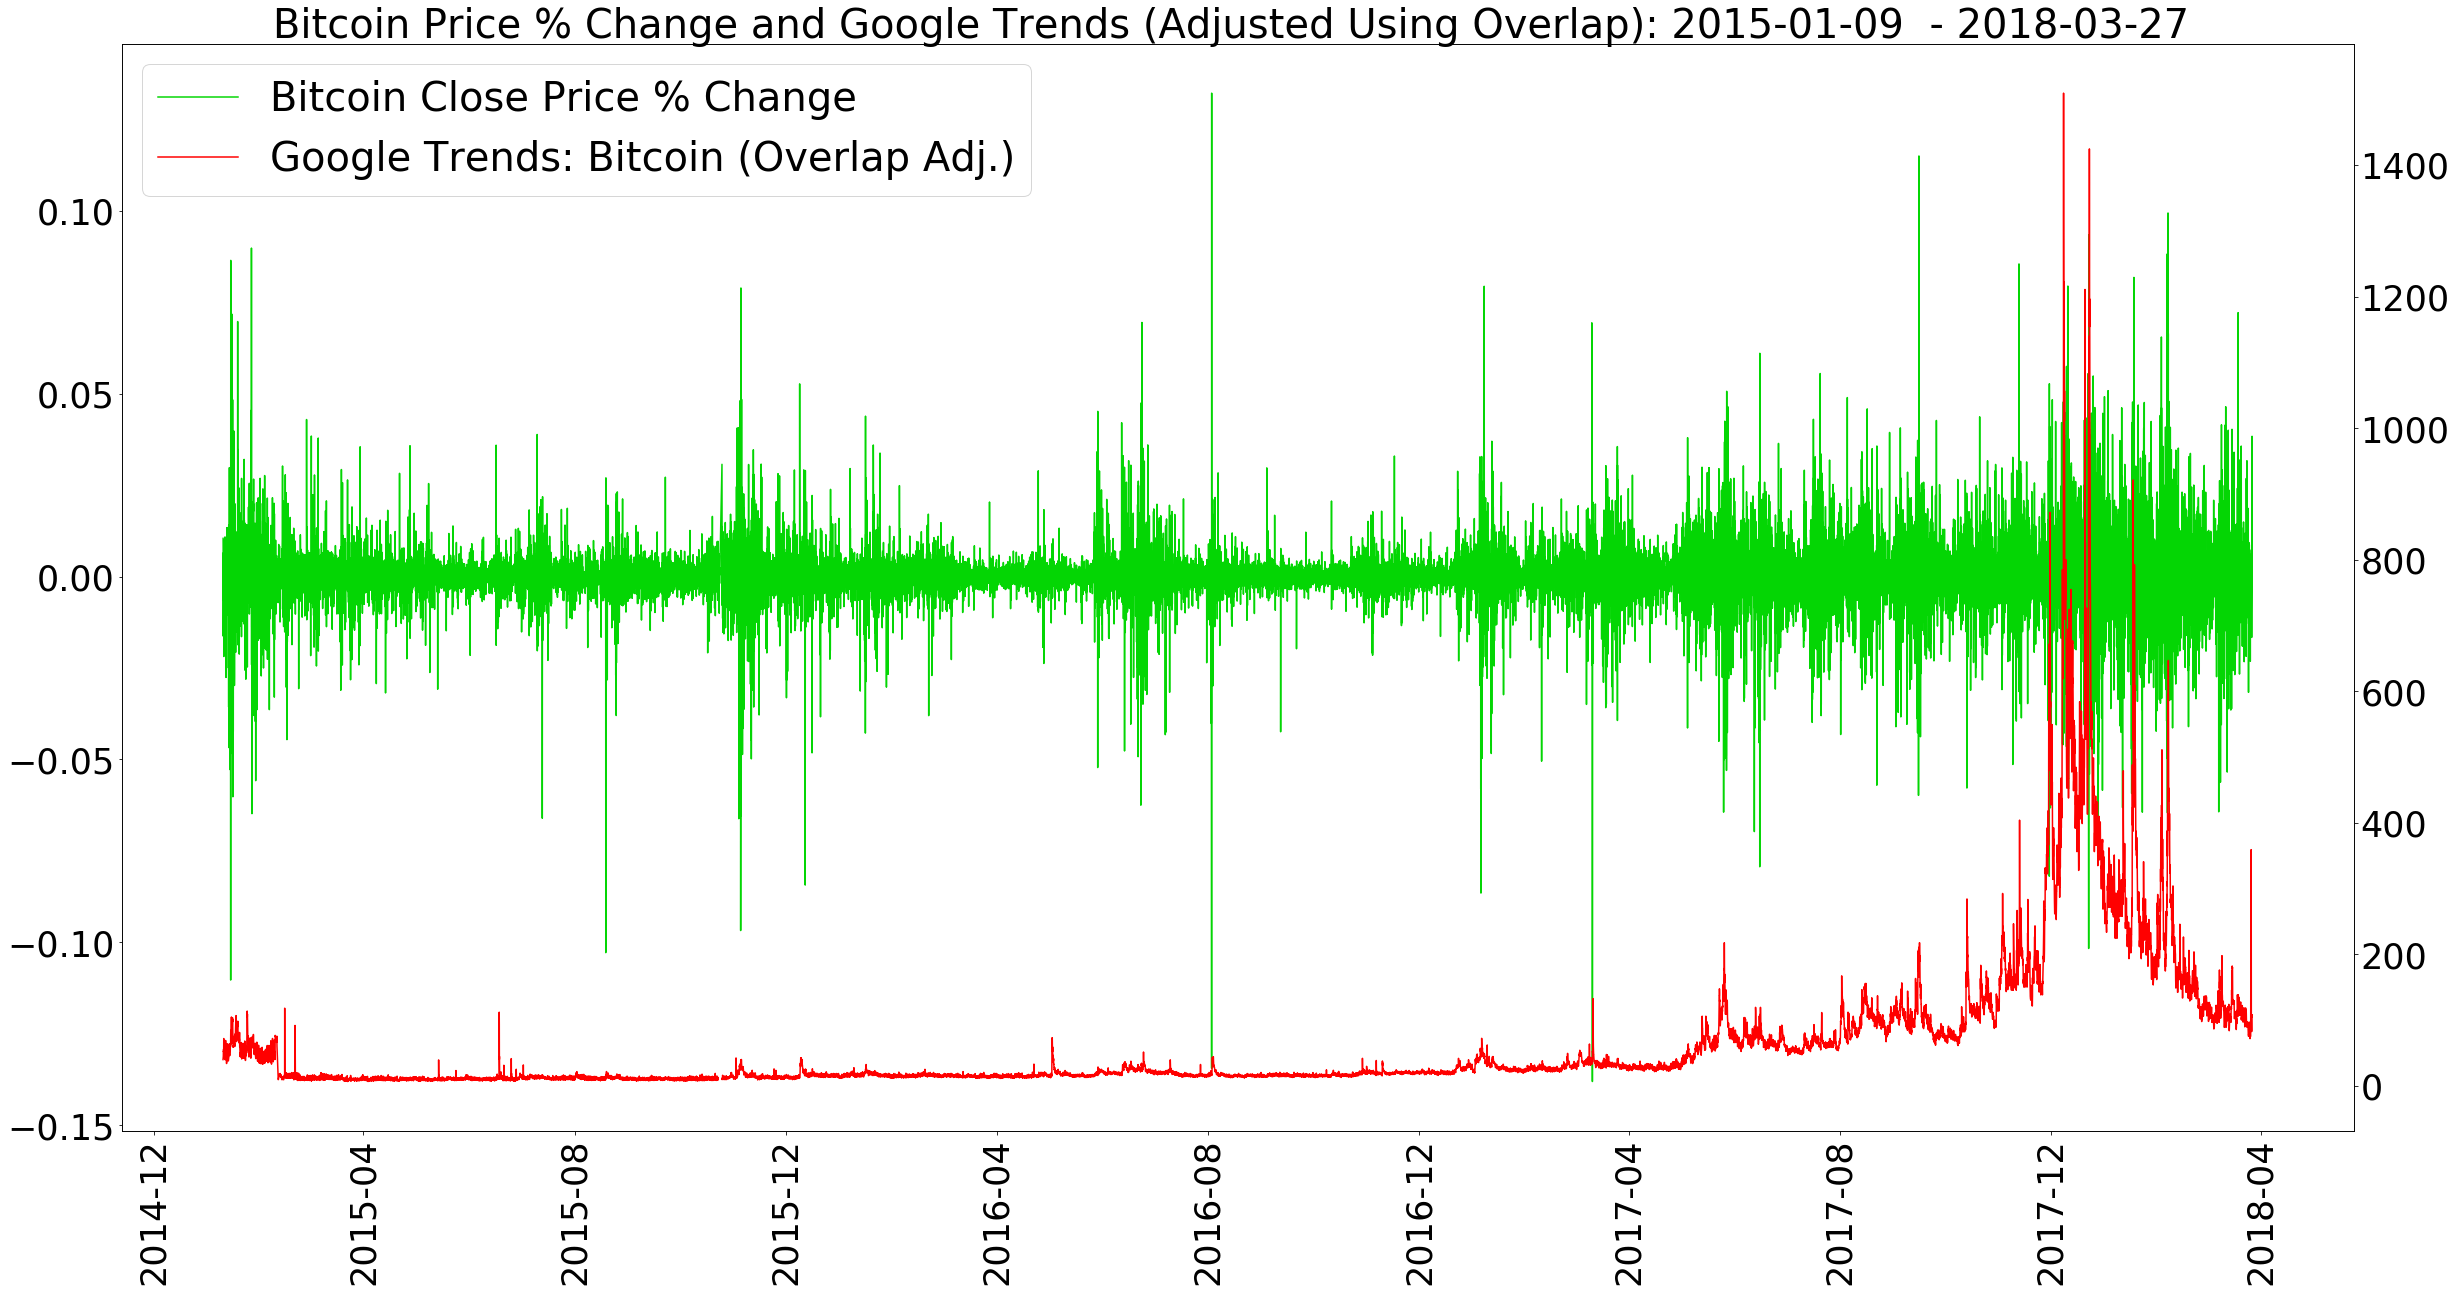

In [106]:
fig, ax = plt.subplots(figsize=(40,20)) 
light_green = '#04D604'
l1, = ax.plot(btc_and_trends_df_hourly_overlap["Date(UTC)"], btc_and_trends_df_hourly_overlap["Close Price % Change"], color=light_green)
ax2 = ax.twinx() 
l2, = ax2.plot(btc_and_trends_df_hourly_overlap["Date(UTC)"], btc_and_trends_df_hourly_overlap["Bitcoin (Adj.Overlap)"], color='red' )
ax.set_title('Bitcoin Price % Change and Google Trends (Adjusted Using Overlap): ' + str(btc_and_trends_df_hourly_overlap["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(btc_and_trends_df_hourly_overlap["Date(UTC)"].iloc[-1])[:-8], fontsize=40 )
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.rcParams.update({'font.size': 35})
plt.legend([l1, l2],["Bitcoin Close Price % Change", "Google Trends: Bitcoin (Overlap Adj.)" ], fontsize=40)
plt.show();

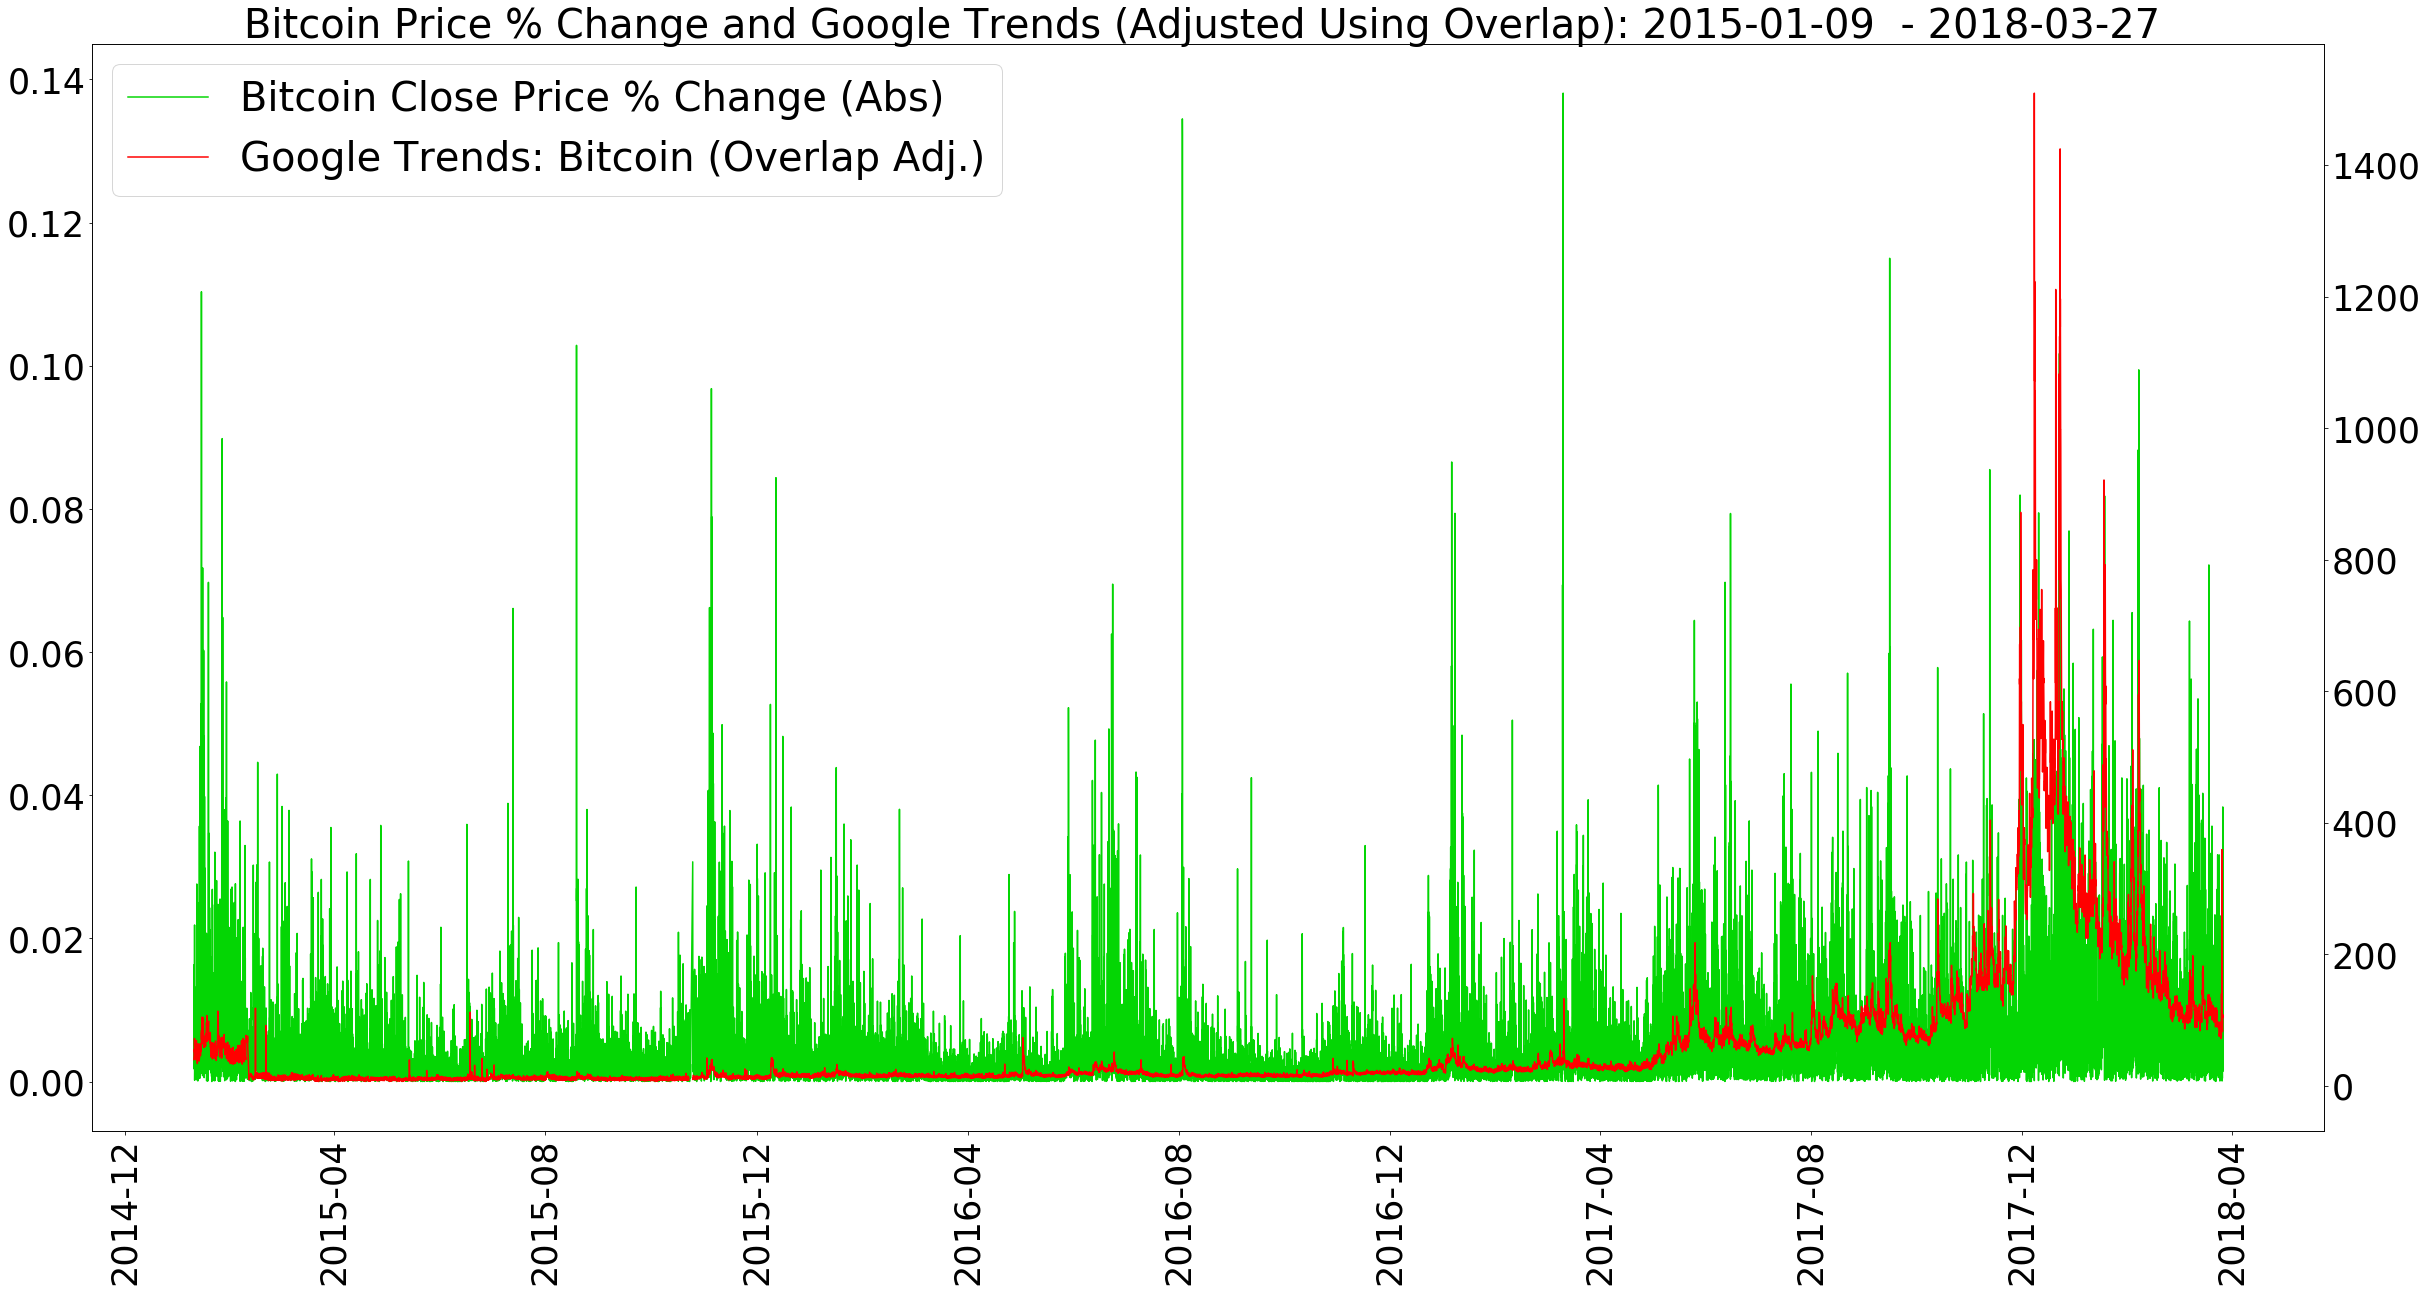

In [107]:
fig, ax = plt.subplots(figsize=(40,20)) 
l1, = ax.plot(btc_and_trends_df_hourly_overlap["Date(UTC)"], btc_and_trends_df_hourly_overlap["Close Price % Change (Abs)"], color=light_green)
ax2 = ax.twinx() 
l2, = ax2.plot(btc_and_trends_df_hourly_overlap["Date(UTC)"], btc_and_trends_df_hourly_overlap["Bitcoin (Adj.Overlap)"], color='red' )
ax.set_title('Bitcoin Price % Change and Google Trends (Adjusted Using Overlap): ' + str(btc_and_trends_df_hourly_overlap["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(btc_and_trends_df_hourly_overlap["Date(UTC)"].iloc[-1])[:-8], fontsize=40 )
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.rcParams.update({'font.size': 35})
plt.legend([l1, l2],["Bitcoin Close Price % Change (Abs)", "Google Trends: Bitcoin (Overlap Adj.)" ], fontsize=40)
plt.show();

In [108]:
# TODO: Investigate if this is merged correctly or not
btc_and_trends_df_hourly = pd.merge(left=btc_df, left_on="Timestamp", right=google_trends_df, right_on="Timestamp")
display(btc_and_trends_df_hourly.head())

Timestamp    Open    High     Low   Close  Volume_(BTC)  \
0  1420840800  289.59  289.94  289.13  289.13     34.042422   
1  1420844400  293.61  293.61  292.15  292.15     36.628012   
2  1420848000  293.89  293.89  293.89  293.89      0.158015   
3  1420851600  289.20  289.20  289.10  289.10     30.985828   
4  1420855200  289.18  289.18  288.57  288.59      7.694195   

   Volume_(Currency)  Weighted_Price           Date(UTC)                date  \
0        9854.490388      289.476771 2015-01-09 22:00:00 2015-01-09 12:00:00   
1       10733.474257      293.040042 2015-01-09 23:00:00 2015-01-09 13:00:00   
2          46.439149      293.890000 2015-01-10 00:00:00 2015-01-09 14:00:00   
3        8960.344674      289.175573 2015-01-10 01:00:00 2015-01-09 15:00:00   
4        2224.105007      289.062740 2015-01-10 02:00:00 2015-01-09 16:00:00   

   Bitcoin  Ethereum  Bitstamp  Buy Bitcoin  Coinbase  isPartial  \
0       40         0         6            1         1      False   
1       41         0         6            1         1      False   
2       43         0         6            1         1      False   
3       43         0         6            1         1      False   
4       45         0         5            1         1      False   

             Date_UTC_trend  Bitcoin (Adj.)  
0 2015-01-09 17:00:00+00:00           100.0  
1 2015-01-09 18:00:00+00:00           102.5  
2 2015-01-09 19:00:00+00:00           107.5  
3 2015-01-09 20:00:00+00:00           107.5  
4 2015-01-09 21:00:00+00:00           112.5

In [109]:
# merge btc_and_trends_df_hourly and btc_and_trends_df_hourly_overlap 

btc_and_trends_df_hourly["Bitcoin (Adj.Overlap)"] = btc_and_trends_df_hourly_overlap["Bitcoin (Adj.Overlap)"] 

display(btc_and_trends_df_hourly.head())

Timestamp    Open    High     Low   Close  Volume_(BTC)  \
0  1420840800  289.59  289.94  289.13  289.13     34.042422   
1  1420844400  293.61  293.61  292.15  292.15     36.628012   
2  1420848000  293.89  293.89  293.89  293.89      0.158015   
3  1420851600  289.20  289.20  289.10  289.10     30.985828   
4  1420855200  289.18  289.18  288.57  288.59      7.694195   

   Volume_(Currency)  Weighted_Price           Date(UTC)                date  \
0        9854.490388      289.476771 2015-01-09 22:00:00 2015-01-09 12:00:00   
1       10733.474257      293.040042 2015-01-09 23:00:00 2015-01-09 13:00:00   
2          46.439149      293.890000 2015-01-10 00:00:00 2015-01-09 14:00:00   
3        8960.344674      289.175573 2015-01-10 01:00:00 2015-01-09 15:00:00   
4        2224.105007      289.062740 2015-01-10 02:00:00 2015-01-09 16:00:00   

   Bitcoin  Ethereum  Bitstamp  Buy Bitcoin  Coinbase  isPartial  \
0       40         0         6            1         1      False   
1       41         0         6            1         1      False   
2       43         0         6            1         1      False   
3       43         0         6            1         1      False   
4       45         0         5            1         1      False   

             Date_UTC_trend  Bitcoin (Adj.)  Bitcoin (Adj.Overlap)  
0 2015-01-09 17:00:00+00:00           100.0                   40.0  
1 2015-01-09 18:00:00+00:00           102.5                   41.0  
2 2015-01-09 19:00:00+00:00           107.5                   43.0  
3 2015-01-09 20:00:00+00:00           107.5                   43.0  
4 2015-01-09 21:00:00+00:00           112.5                   45.0

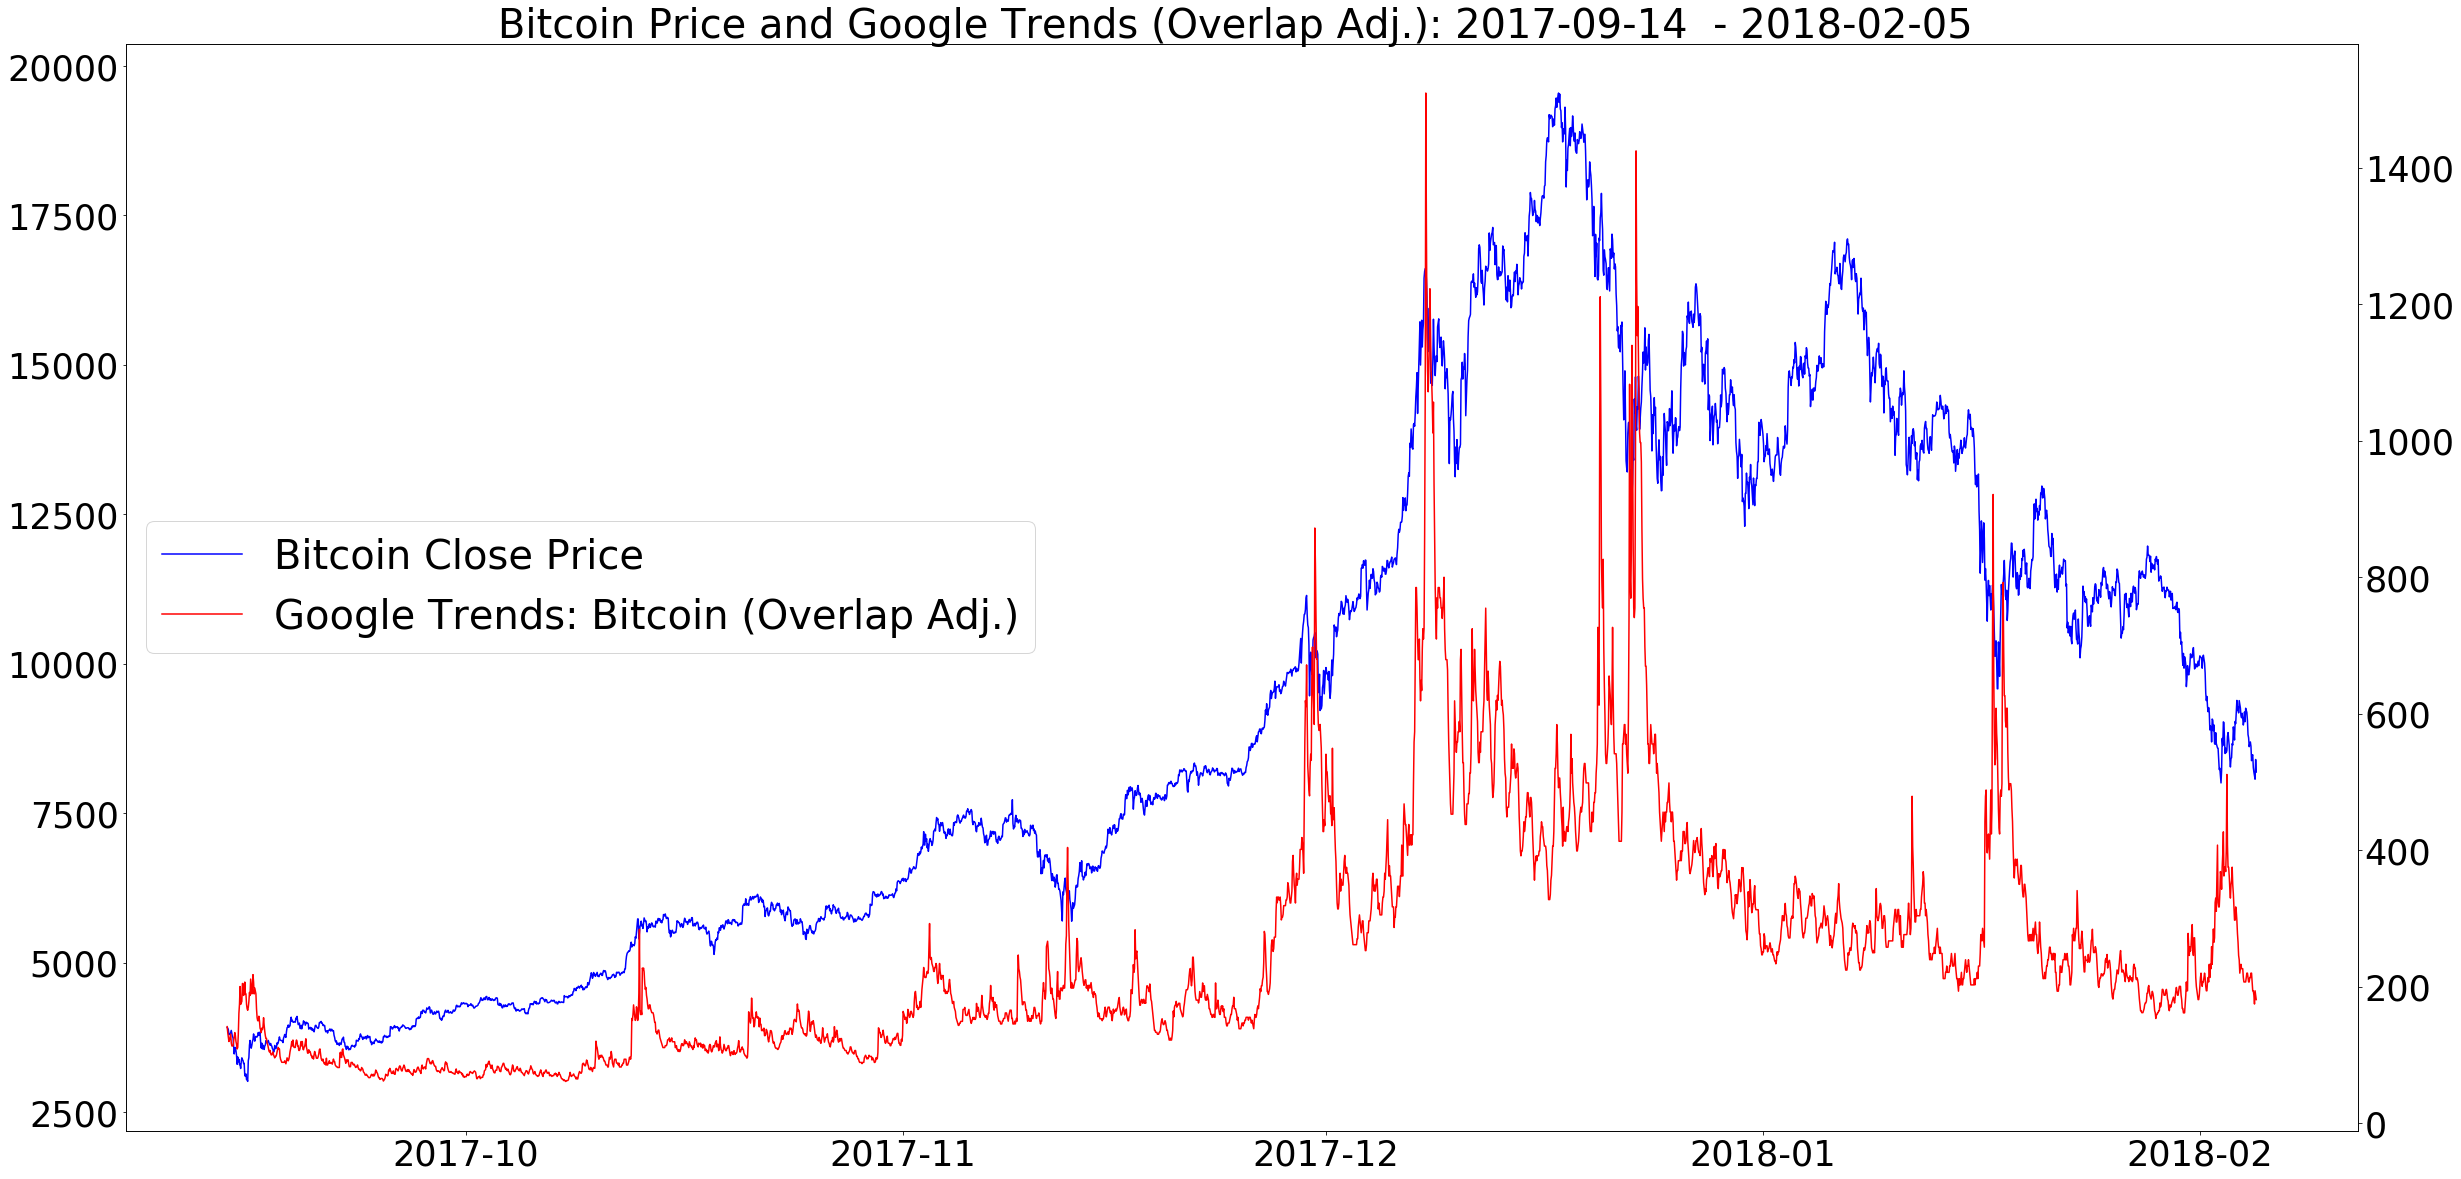

In [110]:
# visualize Bitcoin's recent super spike starting Sep 2017 using Overlap Adjusted Trend Data
sep_2017_to_feb_2018_overlap_df = btc_and_trends_df_hourly_overlap[ (btc_and_trends_df_hourly_overlap["Timestamp"] > 1505347200) & (btc_and_trends_df_hourly_overlap["Timestamp"] <=  1517788800) ]

fig_bitcoin_spike_overlap, ax_bitcoin_spike_overlap = plt.subplots(figsize=(40,20)) 
l1, = ax_bitcoin_spike_overlap.plot(sep_2017_to_feb_2018_overlap_df["Date(UTC)"], sep_2017_to_feb_2018_overlap_df["Close"], color='blue')
ax_bitcoin_spike_overlap_2 = ax_bitcoin_spike_overlap.twinx() 
l2, = ax_bitcoin_spike_overlap_2.plot(sep_2017_to_feb_2018_overlap_df["Date(UTC)"], sep_2017_to_feb_2018_overlap_df["Bitcoin (Adj.Overlap)"], color='red' )
ax_bitcoin_spike_overlap.set_title('Bitcoin Price and Google Trends (Overlap Adj.): ' + str(sep_2017_to_feb_2018_overlap_df["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(sep_2017_to_feb_2018_overlap_df["Date(UTC)"].iloc[-1])[:-8], fontsize=40 )
for tick in ax_bitcoin_overlap.get_xticklabels():
    tick.set_rotation(90)
#plt.rcParams.update({'font.size': 15})
plt.legend([l1, l2],["Bitcoin Close Price", "Google Trends: Bitcoin (Overlap Adj.)"], loc=6, fontsize=40)
plt.show();

# blue is price, red is Overlap adjusted data

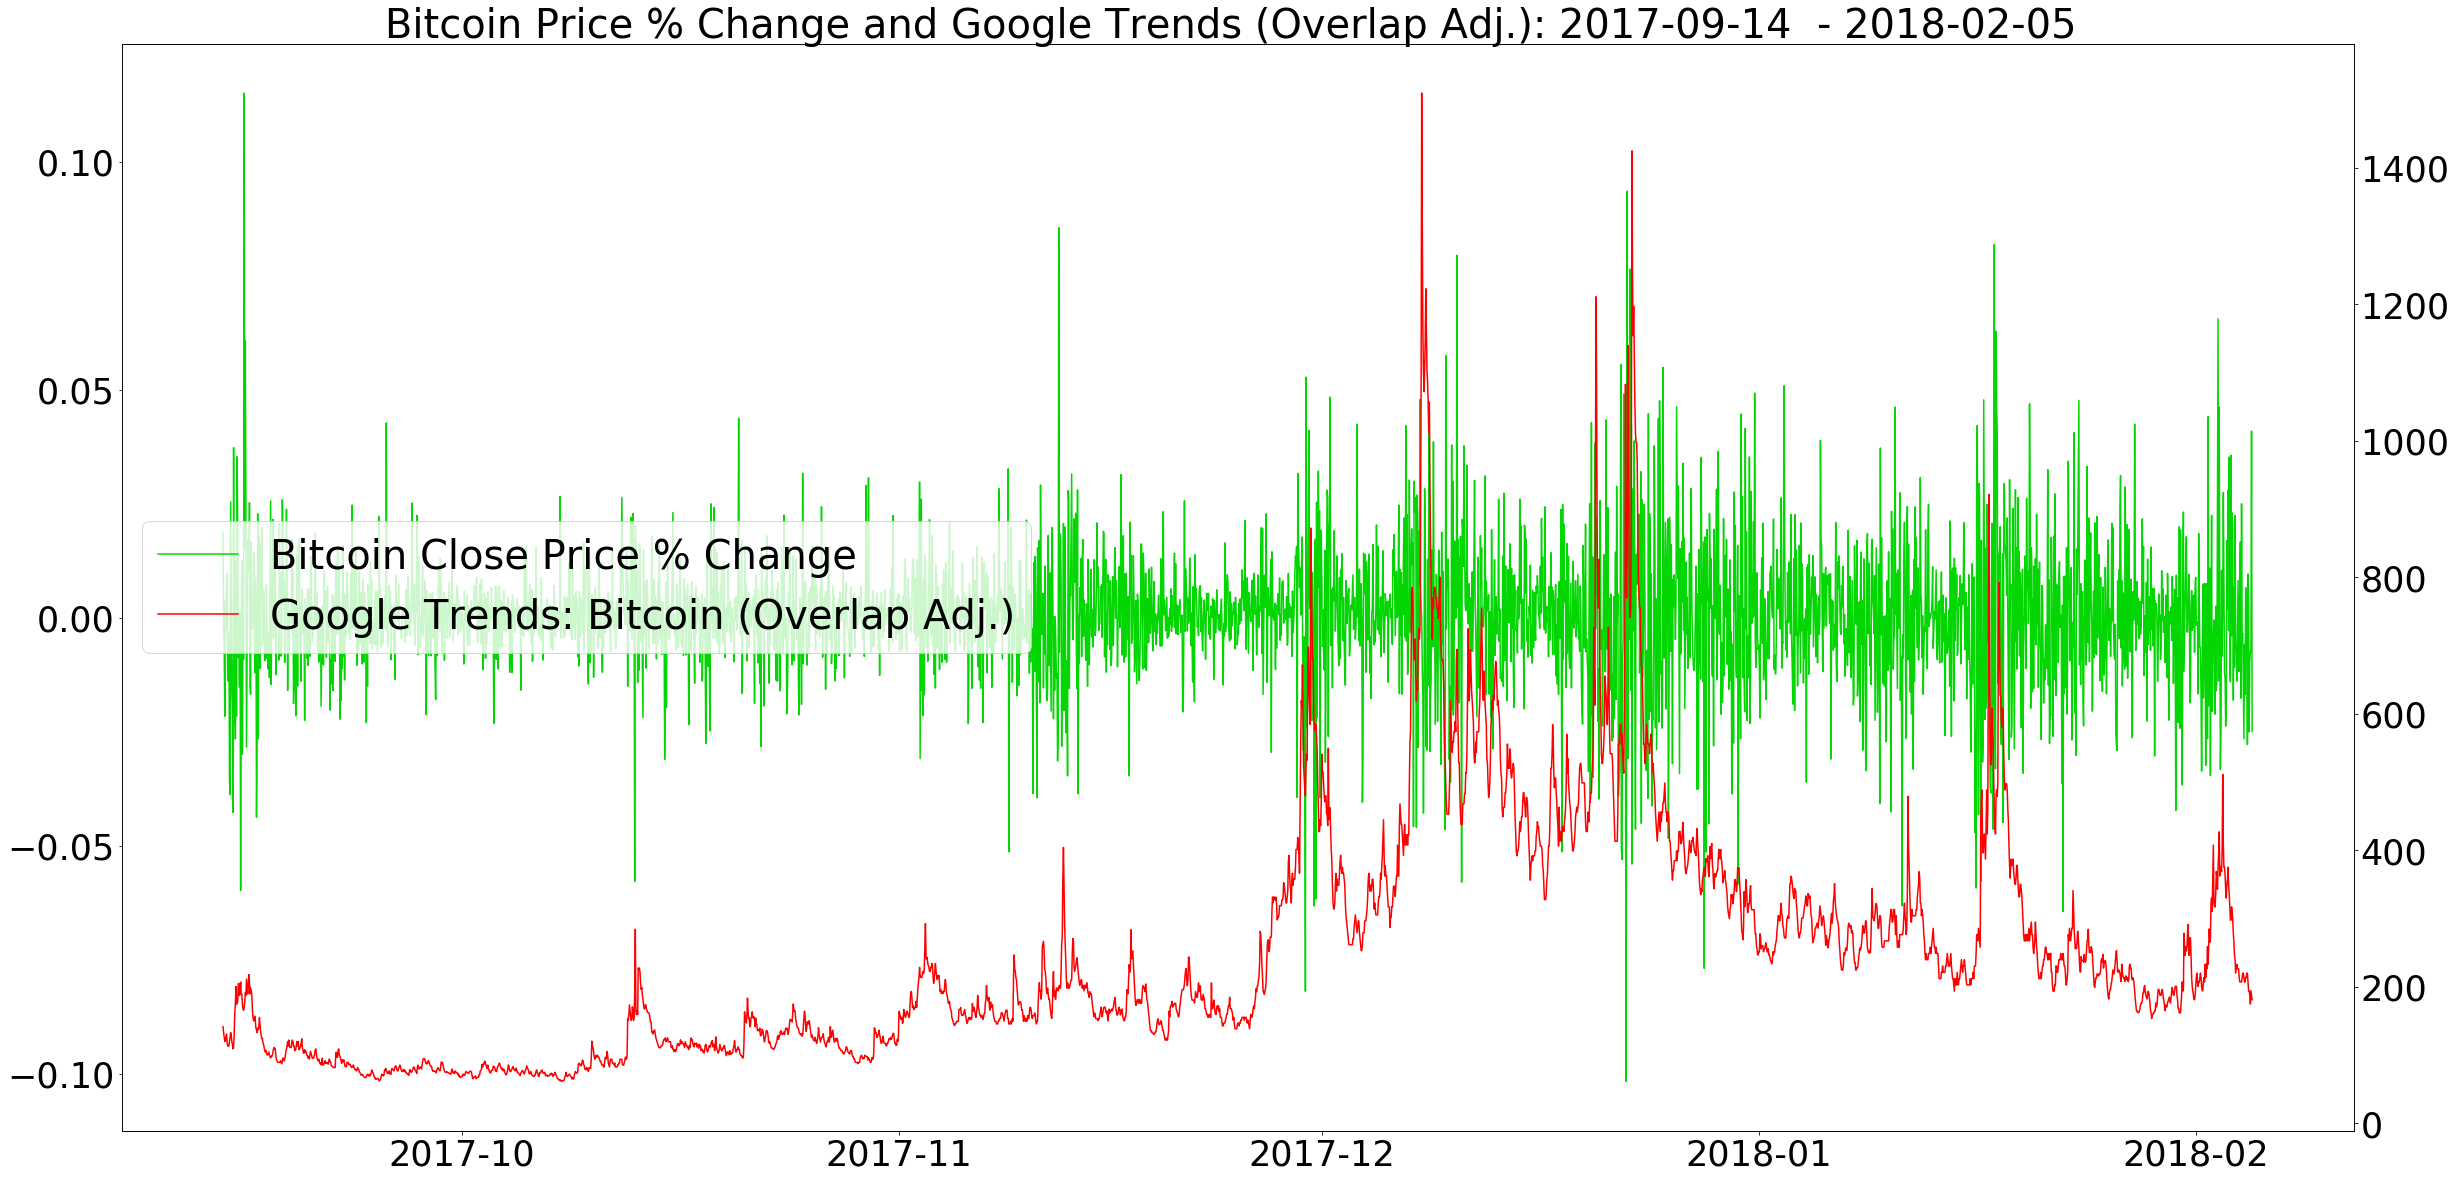

In [111]:
# visualize Bitcoin's recent super spike starting Sep 2017 using Overlap Adjusted Trend Data

fig_bitcoin_spike_overlap, ax_bitcoin_spike_overlap = plt.subplots(figsize=(40,20)) 
l1, = ax_bitcoin_spike_overlap.plot(sep_2017_to_feb_2018_overlap_df["Date(UTC)"], sep_2017_to_feb_2018_overlap_df["Close Price % Change"], color=light_green)
ax_bitcoin_spike_overlap_2 = ax_bitcoin_spike_overlap.twinx() 
l2, = ax_bitcoin_spike_overlap_2.plot(sep_2017_to_feb_2018_overlap_df["Date(UTC)"], sep_2017_to_feb_2018_overlap_df["Bitcoin (Adj.Overlap)"], color='red' )
ax_bitcoin_spike_overlap.set_title('Bitcoin Price % Change and Google Trends (Overlap Adj.): ' + str(sep_2017_to_feb_2018_overlap_df["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(sep_2017_to_feb_2018_overlap_df["Date(UTC)"].iloc[-1])[:-8], fontsize=40 )
for tick in ax_bitcoin_overlap.get_xticklabels():
    tick.set_rotation(90)
#plt.rcParams.update({'font.size': 15})
plt.legend([l1, l2],["Bitcoin Close Price % Change", "Google Trends: Bitcoin (Overlap Adj.)"], loc=6, fontsize=40)
plt.show();

# blue is price, red is Overlap adjusted data

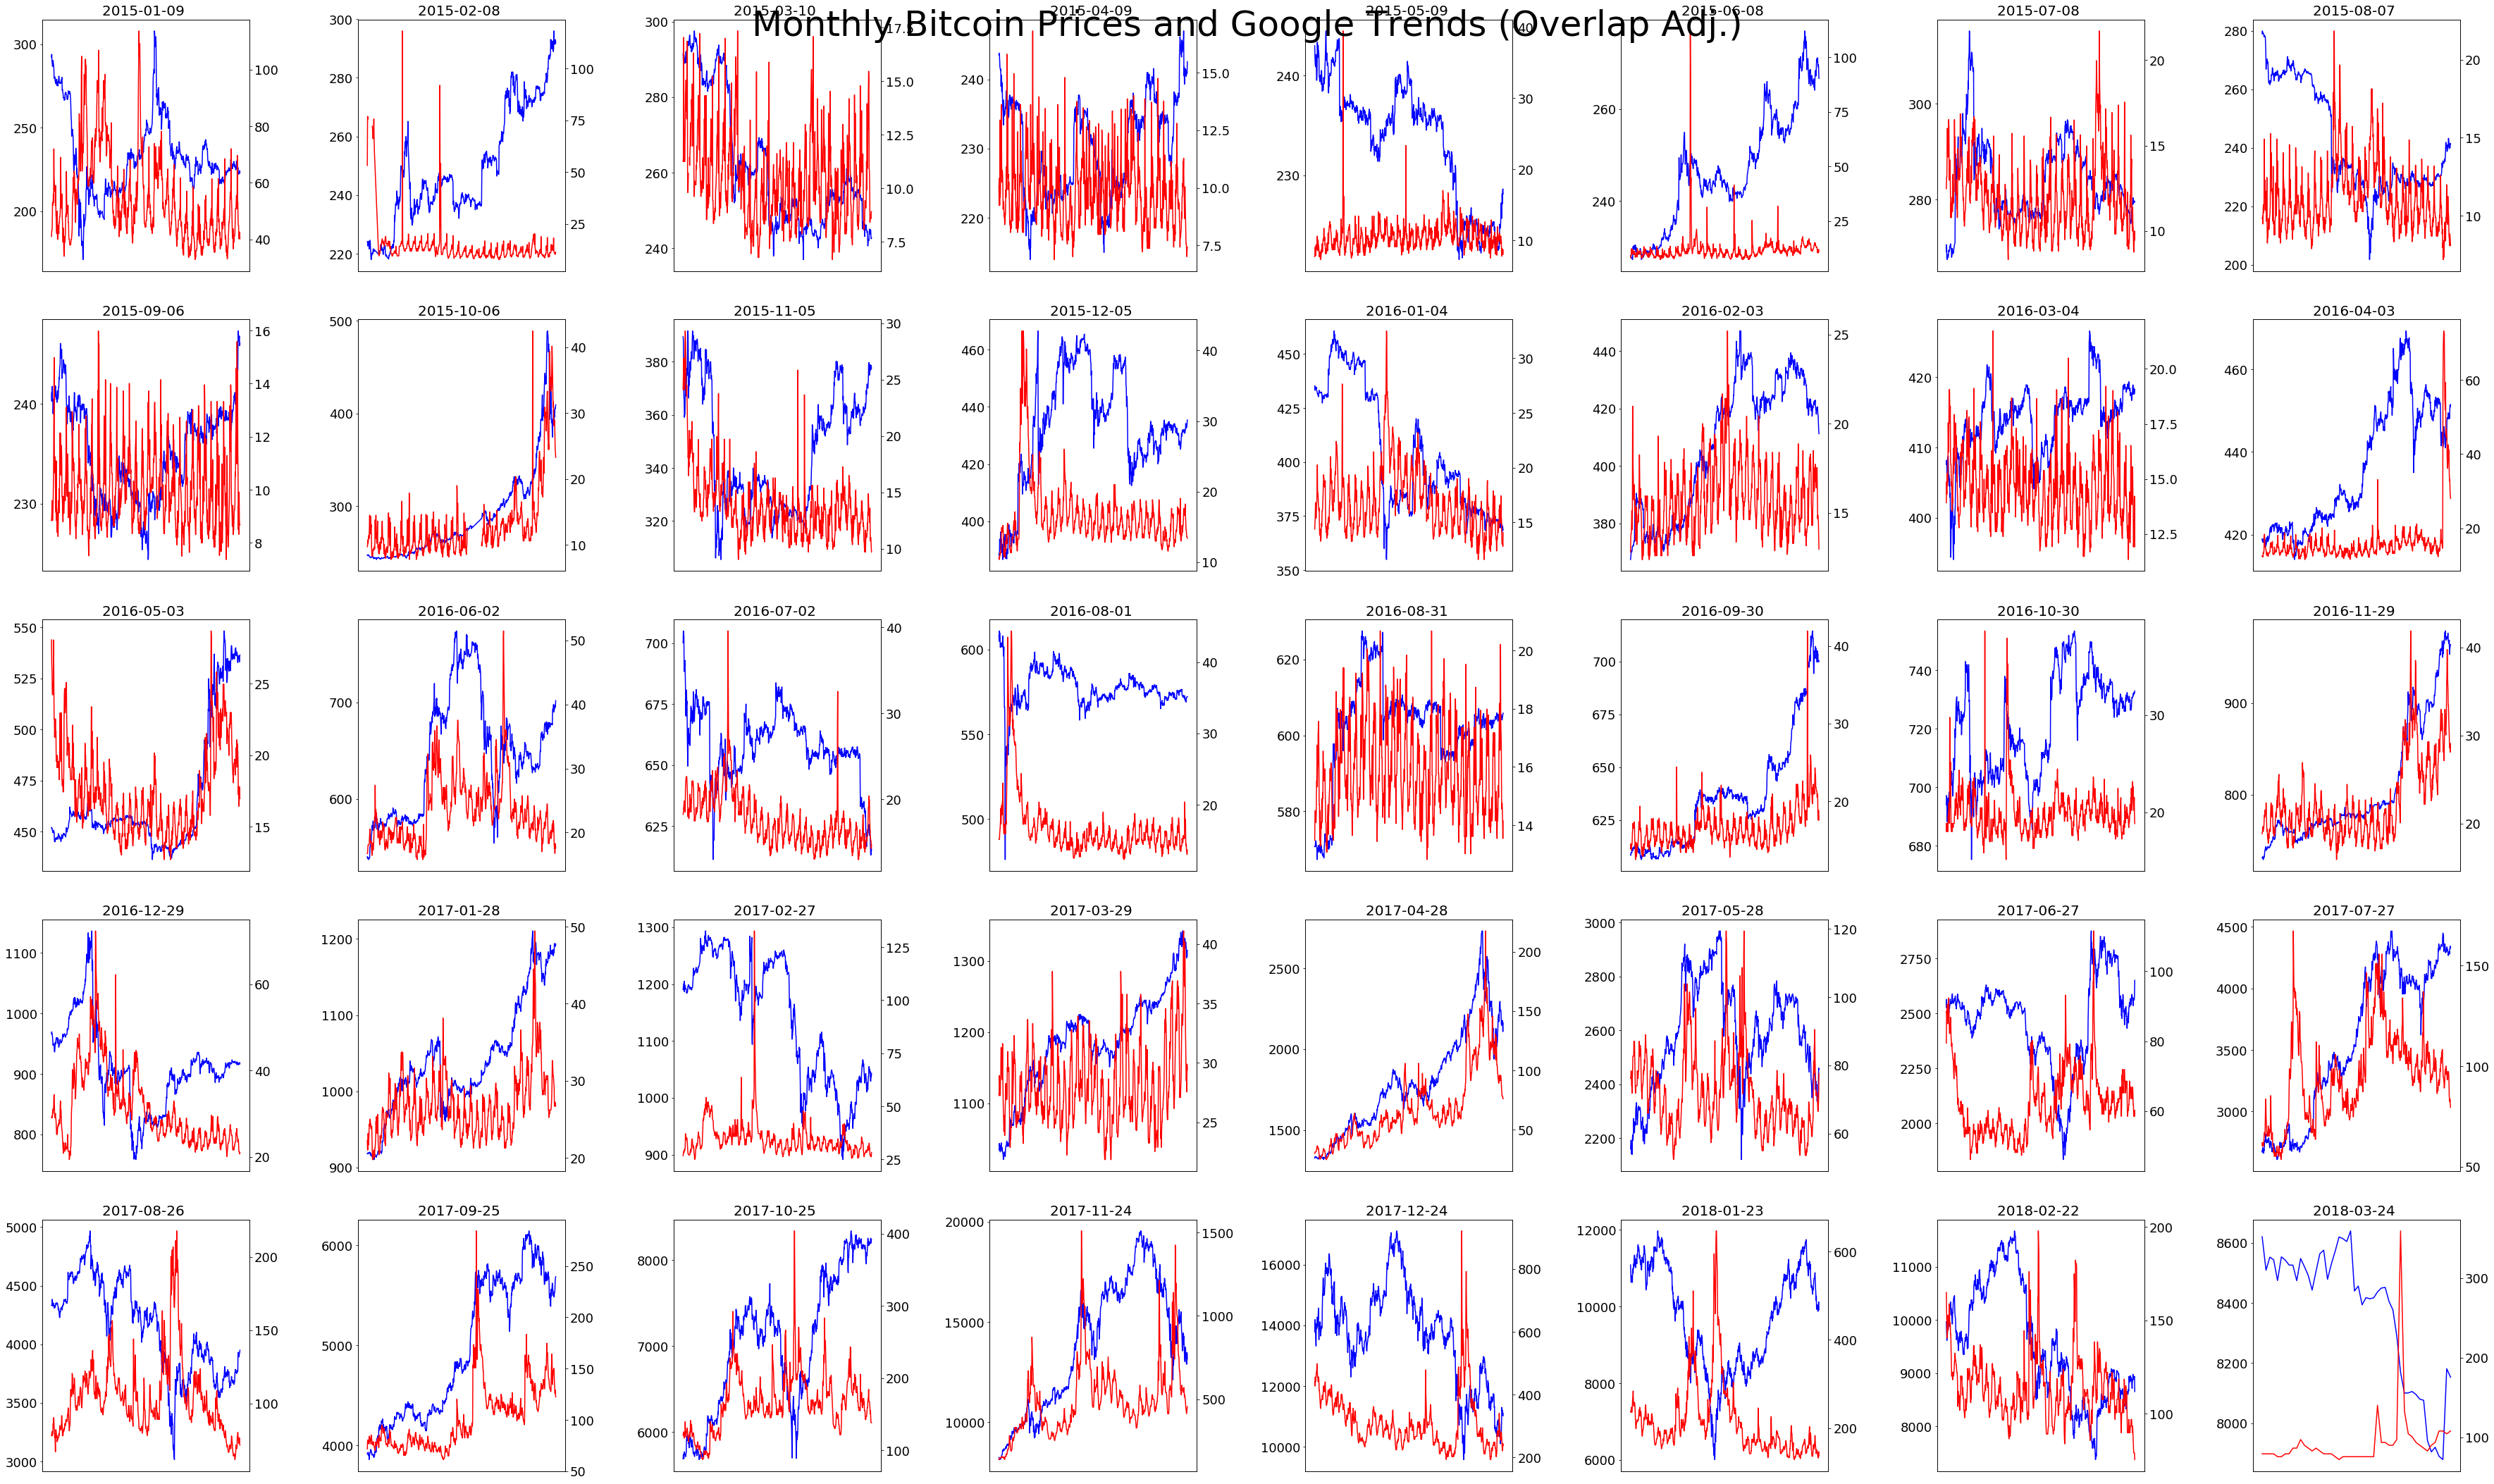

In [112]:
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(50,30), sharex=False, sharey=False)

start_timestamp = btc_and_trends_df_hourly_overlap["Timestamp"][0] 
end_timestamp = btc_and_trends_df_hourly_overlap["Timestamp"].iloc[-1] 

for i, ax in enumerate(axes.flatten()):
    in_range_df = btc_and_trends_df_hourly_overlap[ (btc_and_trends_df_hourly_overlap["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly_overlap["Timestamp"] <= start_timestamp+2592000) ]
    ax.plot(in_range_df["Date(UTC)"], in_range_df["Close"], color='blue')
    ax2 = ax.twinx() 
    ax2.plot(in_range_df["Date(UTC)"], in_range_df["Bitcoin (Adj.Overlap)"], color='red' )
    ax.set_title(str(in_range_df["Date(UTC)"].iloc[0])[:-8], fontsize=20)
    start_timestamp += 2592000
    for tick in ax.get_yticklabels():
        tick.set_fontsize(18)
    for tick in ax2.get_yticklabels():
        tick.set_fontsize(18)
    ax.set_xticks([])
            
fig.suptitle("Monthly Bitcoin Prices and Google Trends (Overlap Adj.)", fontsize=50)
fig.subplots_adjust(top=0.94)
fig.tight_layout()
plt.show();

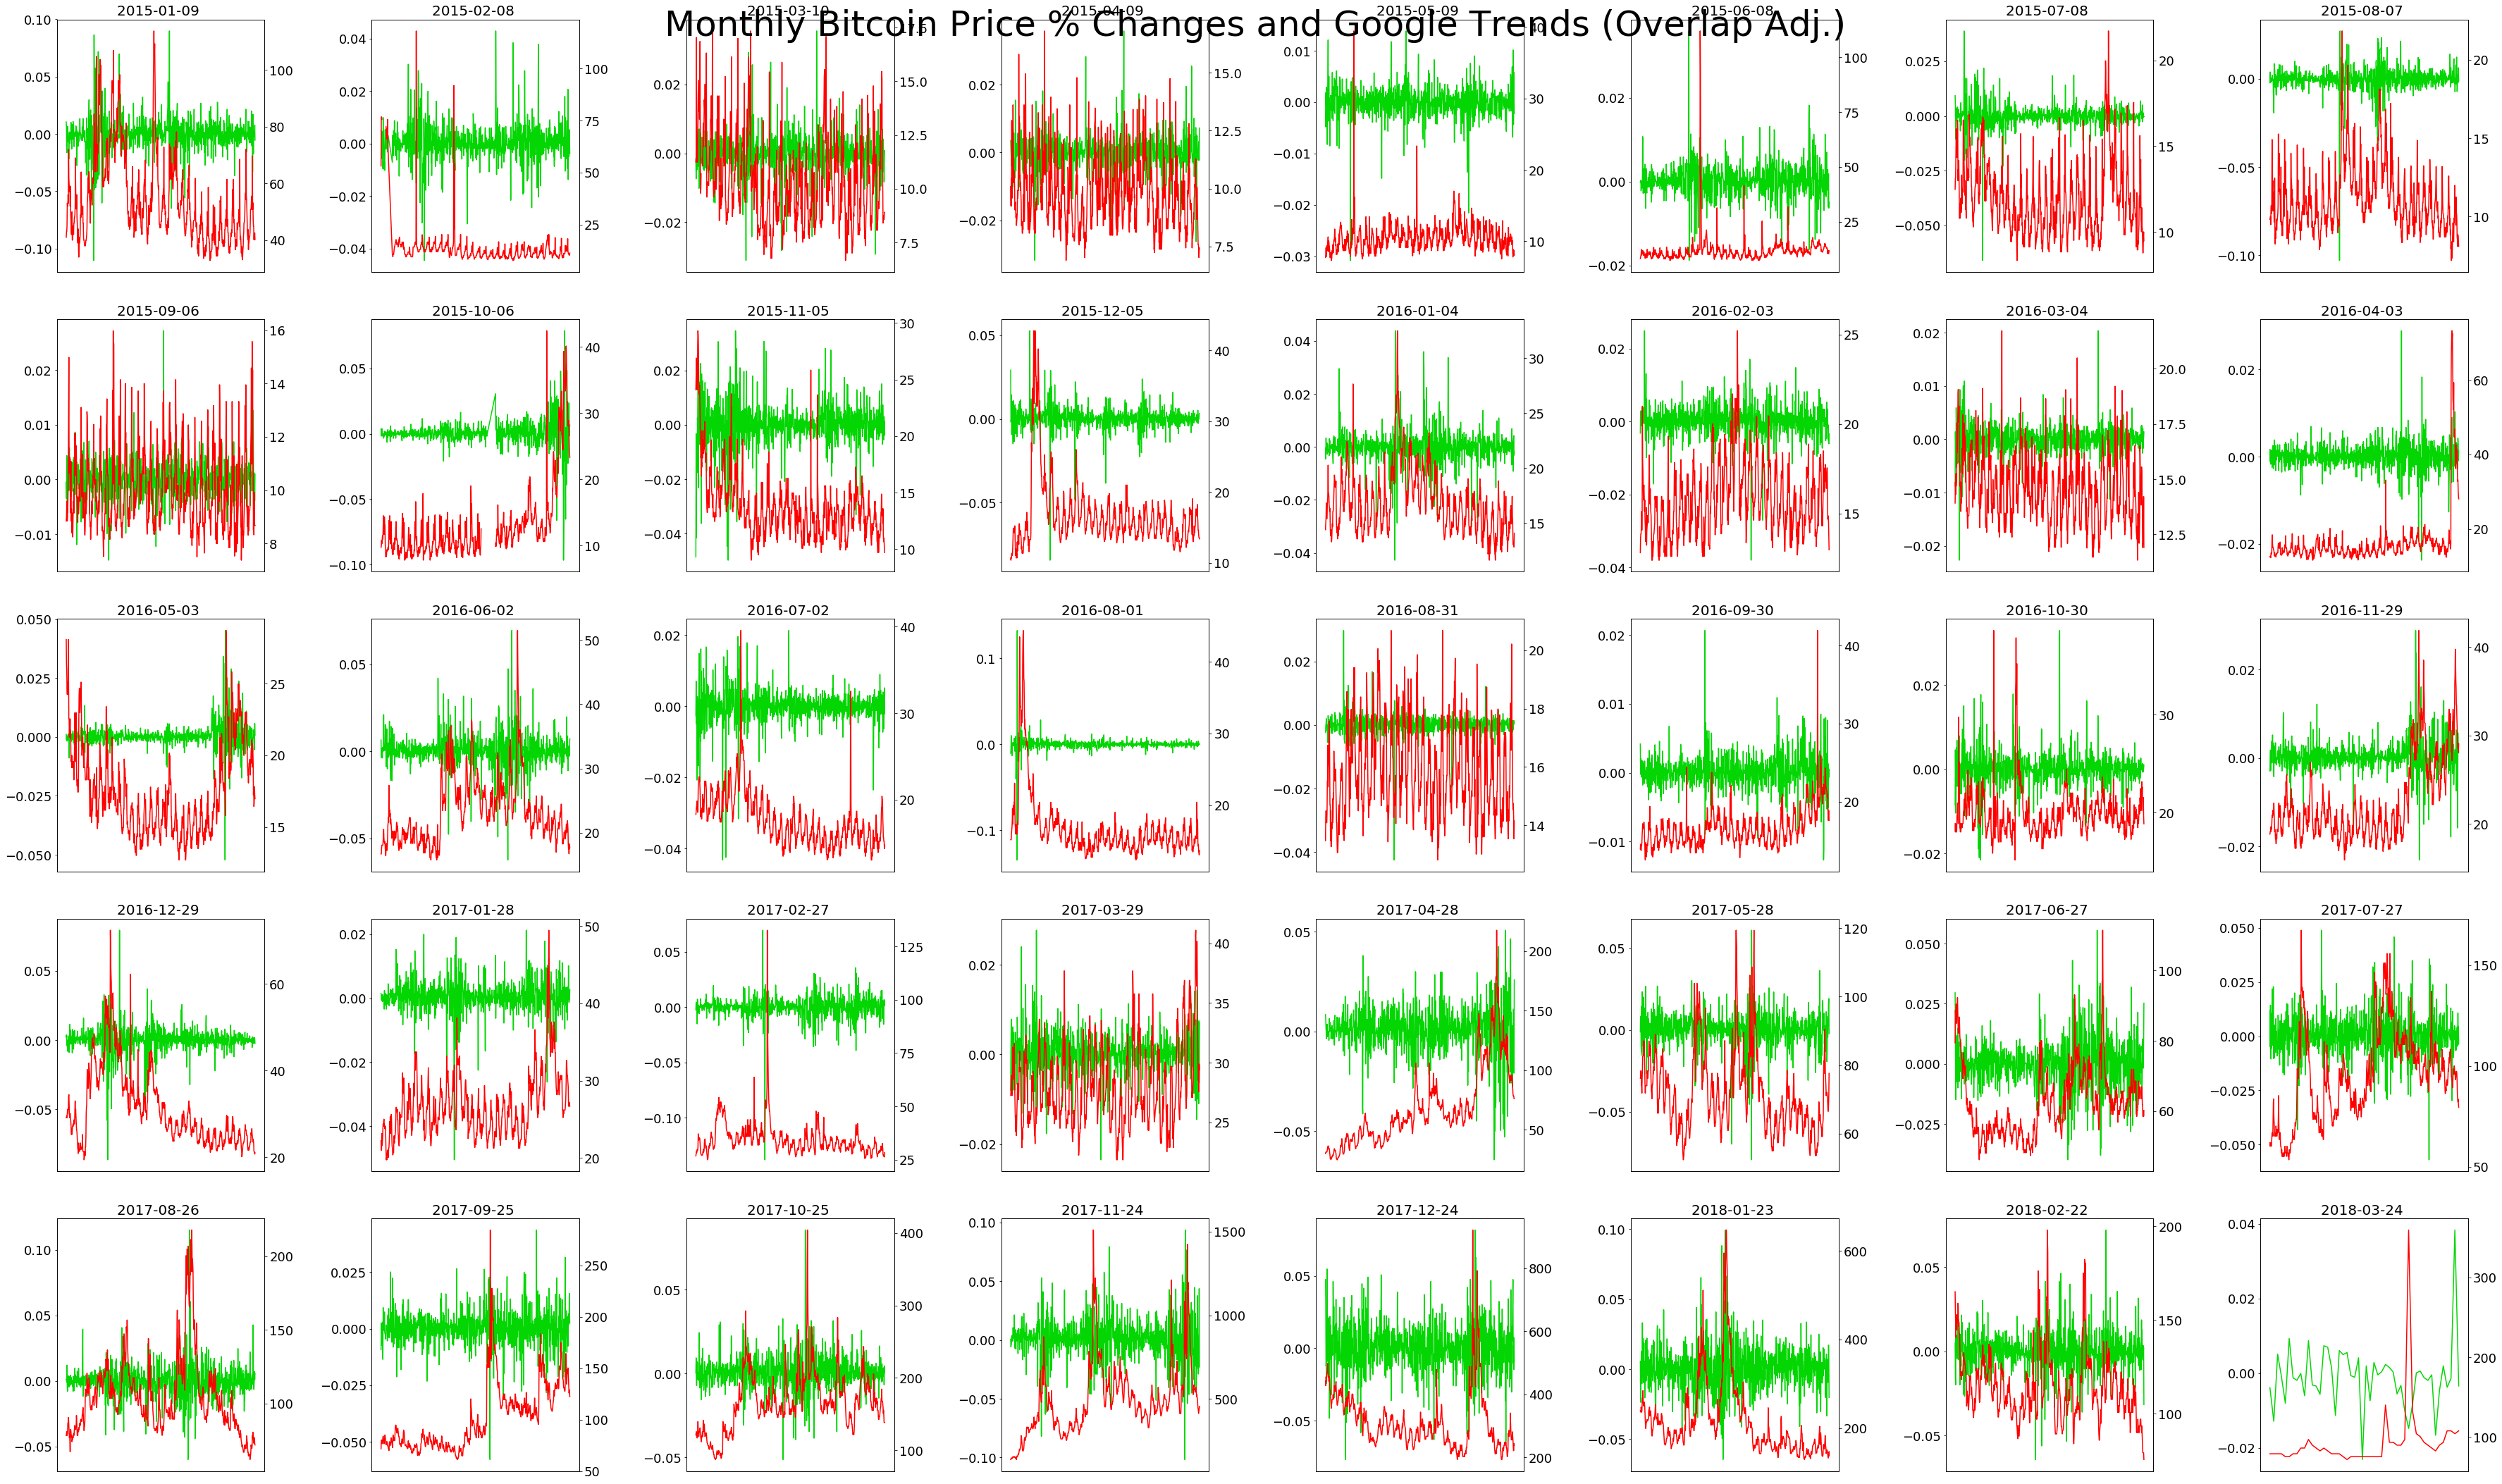

In [114]:
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(50,30), sharex=False, sharey=False)

start_timestamp = btc_and_trends_df_hourly_overlap["Timestamp"][0] 
end_timestamp = btc_and_trends_df_hourly_overlap["Timestamp"].iloc[-1] 

for i, ax in enumerate(axes.flatten()):
    in_range_df = btc_and_trends_df_hourly_overlap[ (btc_and_trends_df_hourly_overlap["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly_overlap["Timestamp"] <= start_timestamp+2592000) ]
    ax.plot(in_range_df["Date(UTC)"], in_range_df["Close Price % Change"], color=light_green)
    ax2 = ax.twinx() 
    ax2.plot(in_range_df["Date(UTC)"], in_range_df["Bitcoin (Adj.Overlap)"], color='red' )
    ax.set_title(str(in_range_df["Date(UTC)"].iloc[0])[:-8], fontsize=20)
    start_timestamp += 2592000
    for tick in ax.get_yticklabels():
        tick.set_fontsize(18)
    for tick in ax2.get_yticklabels():
        tick.set_fontsize(18)
    ax.set_xticks([])
            
fig.suptitle("Monthly Bitcoin Price % Changes and Google Trends (Overlap Adj.)", fontsize=50)
fig.subplots_adjust(top=0.94)
fig.tight_layout()
plt.show();

## Correlation and Anomaly Detection using Luminol

In [115]:
# TODO: Modularize this cell

from luminol.anomaly_detector import AnomalyDetector 
from luminol.correlator import Correlator

# This Cell is for the Historically Adjusted 

# Convert dataframe into dictionary to put into luminol
timestamp_close_df = btc_and_trends_df_hourly[['Timestamp', 'Close']]
timestamp_bitcoin_trend_df = btc_and_trends_df_hourly[['Timestamp', "Bitcoin (Adj.)"]]
timestamp_bitcoin_overlap_trend_df = btc_and_trends_df_hourly_overlap[['Timestamp', "Bitcoin (Adj.Overlap)" ]]
display(timestamp_close_df.head())
display(timestamp_bitcoin_trend_df.head())
display(timestamp_bitcoin_overlap_trend_df.head())

timestamp_close_dict = timestamp_close_df.set_index('Timestamp')['Close'].to_dict()
timestamp_bitcoin_trend_dict = timestamp_bitcoin_trend_df.set_index('Timestamp')["Bitcoin (Adj.)"].to_dict()
timestamp_bitcoin_trend_overlap_dict = timestamp_bitcoin_overlap_trend_df.set_index('Timestamp')["Bitcoin (Adj.Overlap)"].to_dict()

btc_and_trends_df_hourly["Is Price Anomaly (Bitmap Detector)"] = 0 

# anomaly detector 
anomaly_detector = AnomalyDetector(timestamp_close_dict)#  , score_percent_threshold=0.5)
score = anomaly_detector.get_all_scores()

anomaly_df = pd.DataFrame(columns=['Timestamp', 'Date', 'Anomaly Score'])

for timestamp, value in score.iteritems():
    # print anomaly score if greater than 0 
    readable_date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H')
    #display( str(readable_date) + '->' + str(value))
    anomaly_df = anomaly_df.append({'Timestamp':timestamp, 'Date': readable_date, 'Anomaly Score': value}, ignore_index=True)
    # correlate Close price and Google Trends
    
anomalies = anomaly_detector.get_anomalies()
for anomaly in anomalies:
    time_period = anomaly.get_time_window()
    
#     # to do: tweek the parameters for correlator (like the shift allowed)
#     correlator_historical = Correlator(timestamp_close_dict, timestamp_bitcoin_trend_dict, time_period, algorithm_name='cross_correlator', algorithm_params= {'max_shift_seconds':86400})
#     if correlator_historical.is_correlated(threshold=0.5):
#         display("Trend data (Historical Adj.) correlate with Price at time period (%d, %d)" % time_period)
    
    start, end = time_period
        
    # set those with anomalies to 1 
    is_in_period = (btc_and_trends_df_hourly["Timestamp"] > start) & (btc_and_trends_df_hourly["Timestamp"] < end)
    btc_and_trends_df_hourly.loc[is_in_period, "Is Price Anomaly (Bitmap Detector)"] = 1 
    
    correlator_overlap = Correlator(timestamp_close_dict, timestamp_bitcoin_trend_overlap_dict, time_period, algorithm_name='cross_correlator', algorithm_params= {'max_shift_seconds':86400})
    if correlator_overlap.is_correlated(threshold=0.5):
        display("Trend data (Overlap Adj.) correlate with Price at time period (%d, %d). There is also an price anomaly during this time." % time_period)
        

display('There were '+ str(len(anomalies))+ ' anomalies in the Timeseries Bitcoin Price data ')

display(anomaly_df.head())

Timestamp   Close
0  1420840800  289.13
1  1420844400  292.15
2  1420848000  293.89
3  1420851600  289.10
4  1420855200  288.59

Timestamp  Bitcoin (Adj.)
0  1420840800           100.0
1  1420844400           102.5
2  1420848000           107.5
3  1420851600           107.5
4  1420855200           112.5

Timestamp  Bitcoin (Adj.Overlap)
0  1420840800                   40.0
1  1420844400                   41.0
2  1420848000                   43.0
3  1420851600                   43.0
4  1420855200                   45.0

'Trend data (Overlap Adj.) correlate with Price at time period (1507399200, 1508191200). There is also an price anomaly during this time.'

'Trend data (Overlap Adj.) correlate with Price at time period (1511550000, 1512273600). There is also an price anomaly during this time.'

'Trend data (Overlap Adj.) correlate with Price at time period (1512424800, 1513144800). There is also an price anomaly during this time.'

'Trend data (Overlap Adj.) correlate with Price at time period (1514775600, 1514952000). There is also an price anomaly during this time.'

'There were 9 anomalies in the Timeseries Bitcoin Price data '

Timestamp           Date  Anomaly Score
0  1420840800  2015-01-09 17            0.0
1  1420844400  2015-01-09 18            0.0
2  1420848000  2015-01-09 19            0.0
3  1420851600  2015-01-09 20            0.0
4  1420855200  2015-01-09 21            0.0

TODO: get anomalies for the % Change, then plot the anomalies for these against the normal Price Graph

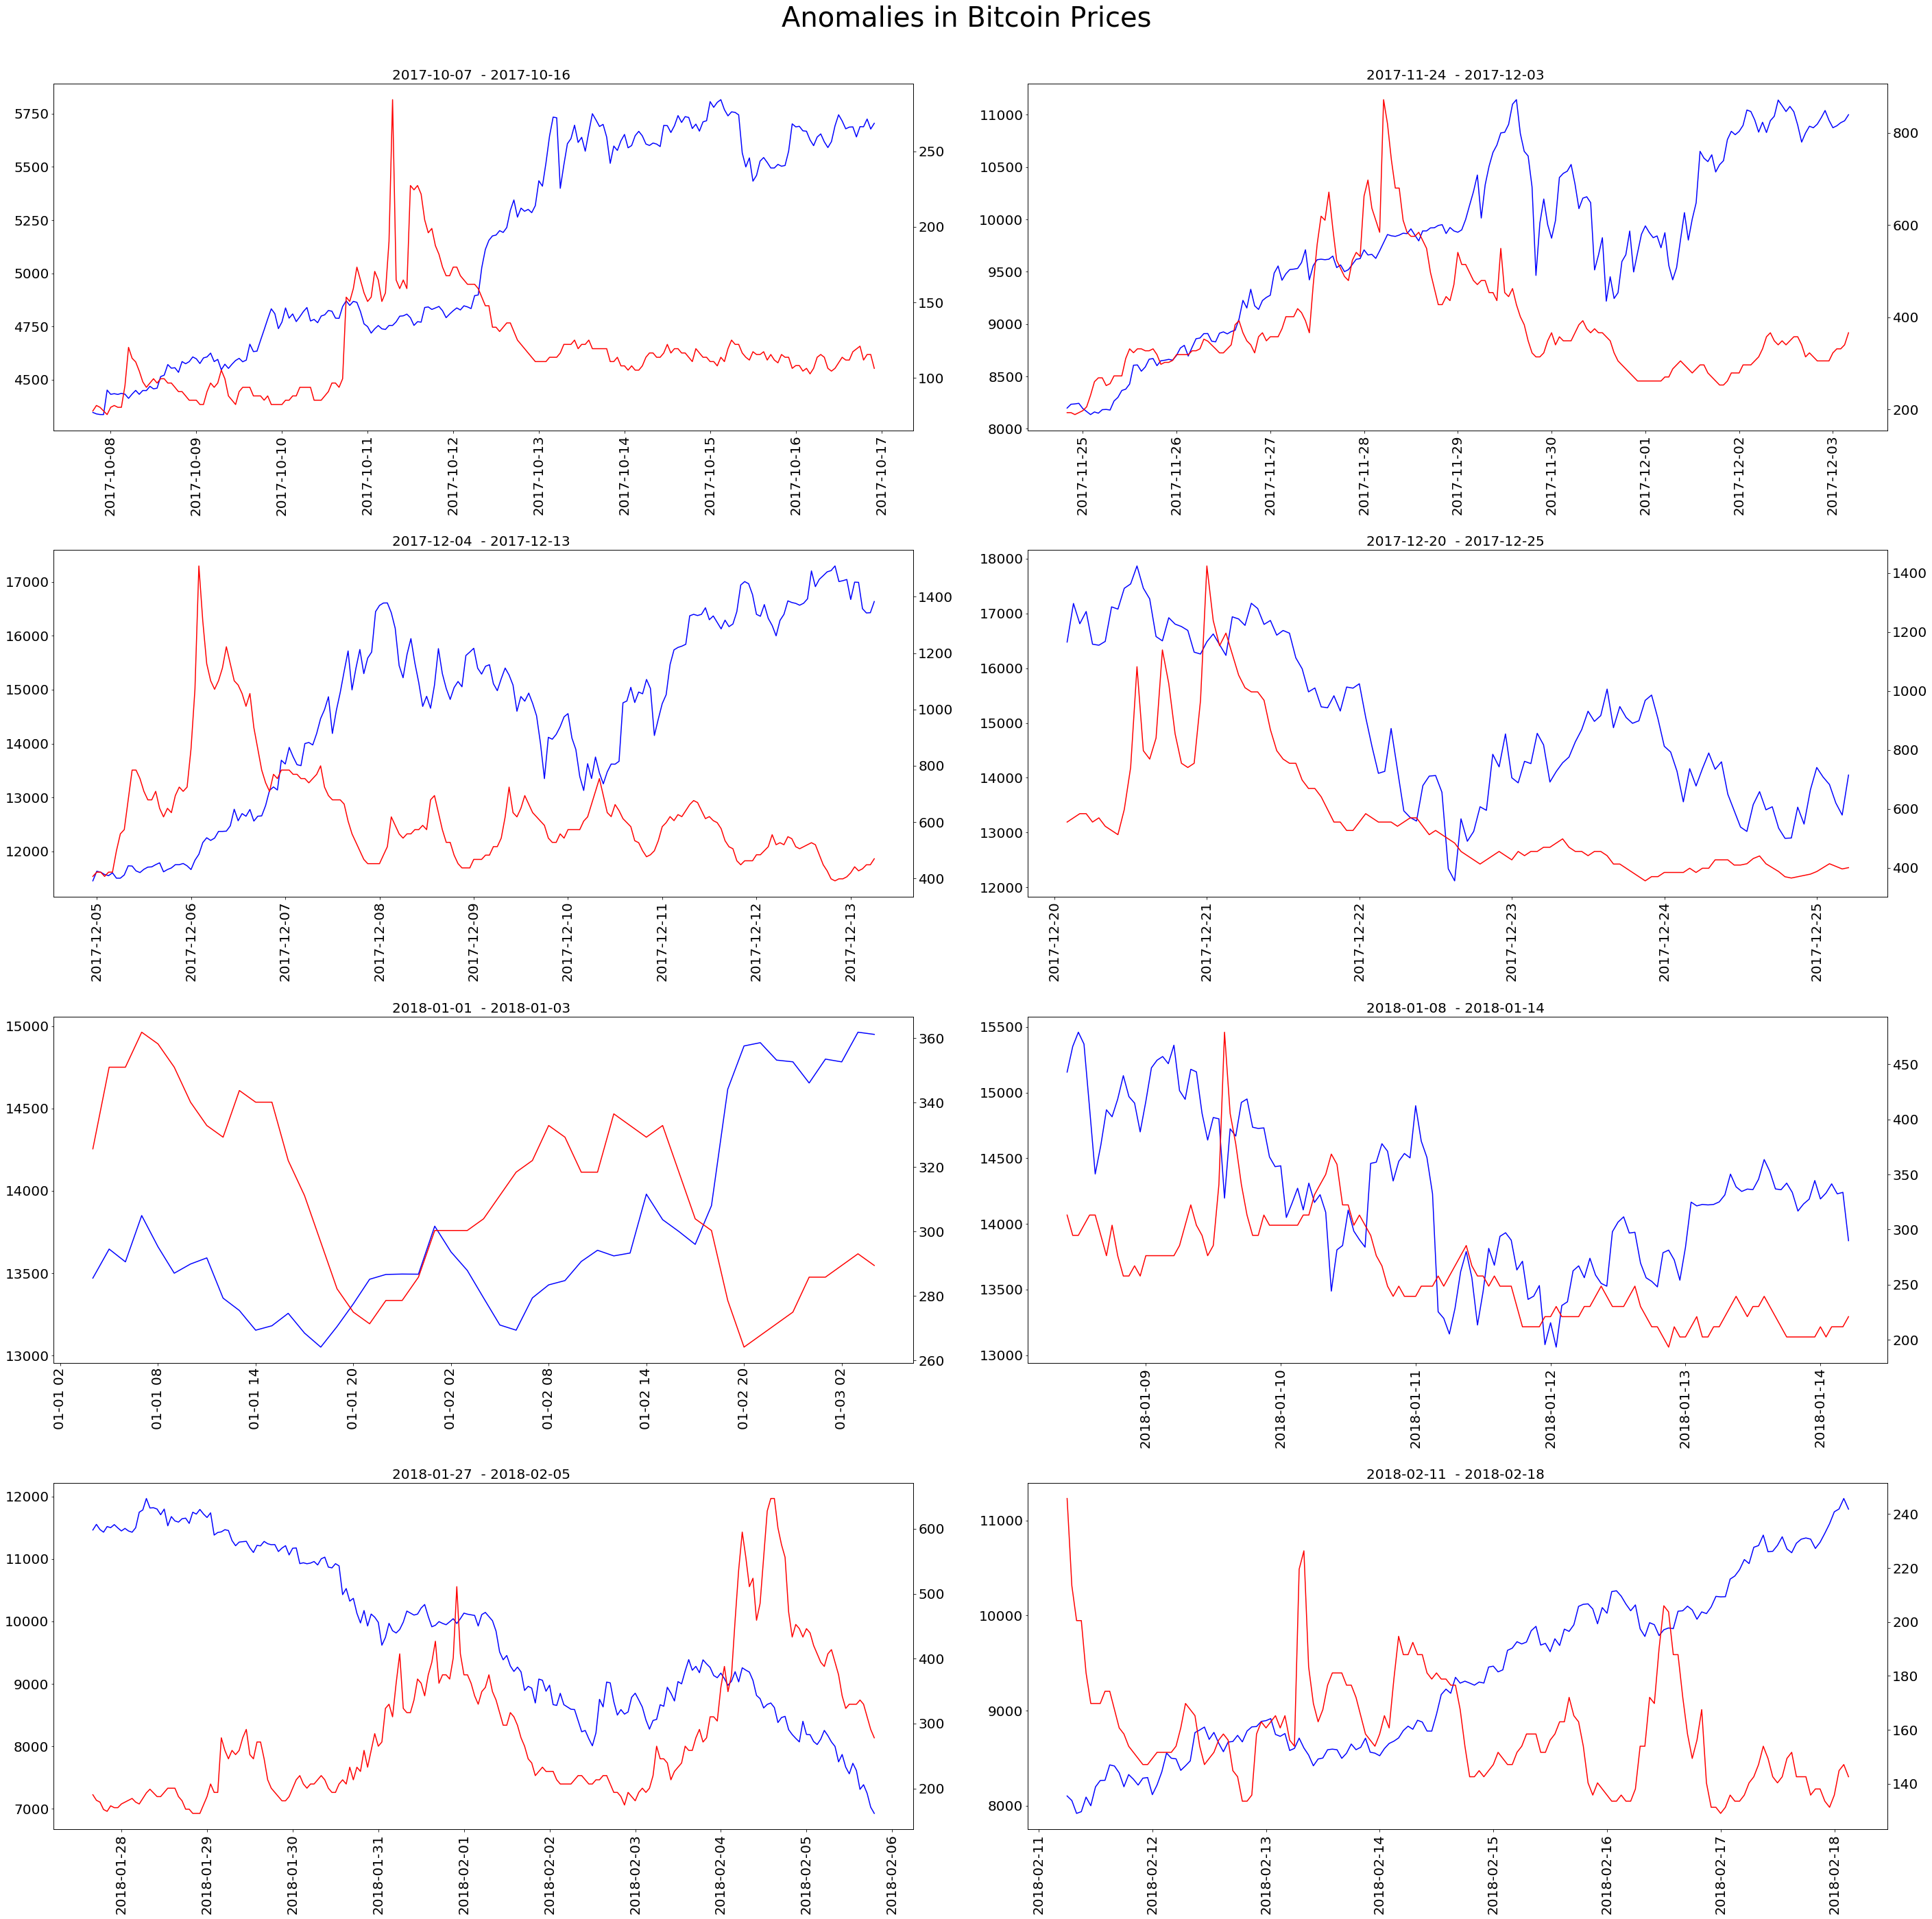

In [116]:
# plots all the anomalies for bitcoin Prices

fig2, axes2 = plt.subplots(nrows=4, ncols=2, figsize=(40,40), sharex=False, sharey=False)

#for i, anomaly in enumerate(anomalies):
for i, ax in enumerate(axes2.flatten()):    
    time_period = anomalies[i].get_time_window()
    start_timestamp = time_period[0]
    end_timestamp = time_period[1] 
        
    in_range_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly["Timestamp"] <= end_timestamp) ]
    #display(in_range_df)
    ax.plot(in_range_df["Date(UTC)"], in_range_df["Close"], color='blue')
    
    ax3 = ax.twinx()
    ax3.plot(in_range_df['Date(UTC)'], in_range_df["Bitcoin (Adj.Overlap)"], color='red')
    
    ax.set_title(str(in_range_df["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(in_range_df["Date(UTC)"].iloc[-1])[:-8], fontsize=20 )
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(20)
        
        
    axes_list = [ax,ax3]
    for ax in axes_list:
        for tick in ax.get_yticklabels():
            tick.set_fontsize(20)
    
fig2.suptitle("Anomalies in Bitcoin Prices", fontsize=40)
fig2.tight_layout()
fig2.subplots_adjust(top=0.94)
#fig2.subplots_adjust(hspace=2)
plt.show();

# Blue is Price, Orange is Trend. 

In [117]:
# Using different anomaly detection algorithm called Derivative Detector

# (self, time_series, baseline_time_series=None, score_only=False, score_threshold=None,
#          score_percentile_threshold=None, algorithm_name=None, algorithm_params=None,
#          refine_algorithm_name=None, refine_algorithm_params=None)
anomaly_derivative_detector = AnomalyDetector(timestamp_close_dict, score_percent_threshold=0.5, algorithm_name='derivative_detector')
score = anomaly_detector.get_all_scores()

btc_and_trends_df_hourly["Is Price Anomaly (Derivative Detector)"] = 0 

anomalies_derivative = anomaly_detector.get_anomalies()
for anomaly in anomalies_derivative:
    time_period = anomaly.get_time_window()
    start, end = time_period
        
    # set those with anomalies to 1 
    is_in_period = (btc_and_trends_df_hourly["Timestamp"] > start) & (btc_and_trends_df_hourly["Timestamp"] < end)
    btc_and_trends_df_hourly.loc[is_in_period, "Is Price Anomaly (Derivative Detector)"] = 1 

display('There were '+ str(len(anomalies_derivative))+ ' anomalies in the Timeseries Bitcoin Price data ')
display(btc_and_trends_df_hourly.head()) 


'There were 9 anomalies in the Timeseries Bitcoin Price data '

Timestamp    Open    High     Low   Close  Volume_(BTC)  \
0  1420840800  289.59  289.94  289.13  289.13     34.042422   
1  1420844400  293.61  293.61  292.15  292.15     36.628012   
2  1420848000  293.89  293.89  293.89  293.89      0.158015   
3  1420851600  289.20  289.20  289.10  289.10     30.985828   
4  1420855200  289.18  289.18  288.57  288.59      7.694195   

   Volume_(Currency)  Weighted_Price           Date(UTC)                date  \
0        9854.490388      289.476771 2015-01-09 22:00:00 2015-01-09 12:00:00   
1       10733.474257      293.040042 2015-01-09 23:00:00 2015-01-09 13:00:00   
2          46.439149      293.890000 2015-01-10 00:00:00 2015-01-09 14:00:00   
3        8960.344674      289.175573 2015-01-10 01:00:00 2015-01-09 15:00:00   
4        2224.105007      289.062740 2015-01-10 02:00:00 2015-01-09 16:00:00   

                    ...                    Ethereum  Bitstamp  Buy Bitcoin  \
0                   ...                           0         6            1   
1                   ...                           0         6            1   
2                   ...                           0         6            1   
3                   ...                           0         6            1   
4                   ...                           0         5            1   

   Coinbase  isPartial            Date_UTC_trend Bitcoin (Adj.)  \
0         1      False 2015-01-09 17:00:00+00:00          100.0   
1         1      False 2015-01-09 18:00:00+00:00          102.5   
2         1      False 2015-01-09 19:00:00+00:00          107.5   
3         1      False 2015-01-09 20:00:00+00:00          107.5   
4         1      False 2015-01-09 21:00:00+00:00          112.5   

   Bitcoin (Adj.Overlap)  Is Price Anomaly (Bitmap Detector)  \
0                   40.0                                   0   
1                   41.0                                   0   
2                   43.0                                   0   
3                   43.0                                   0   
4                   45.0                                   0   

   Is Price Anomaly (Derivative Detector)  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  

[5 rows x 21 columns]

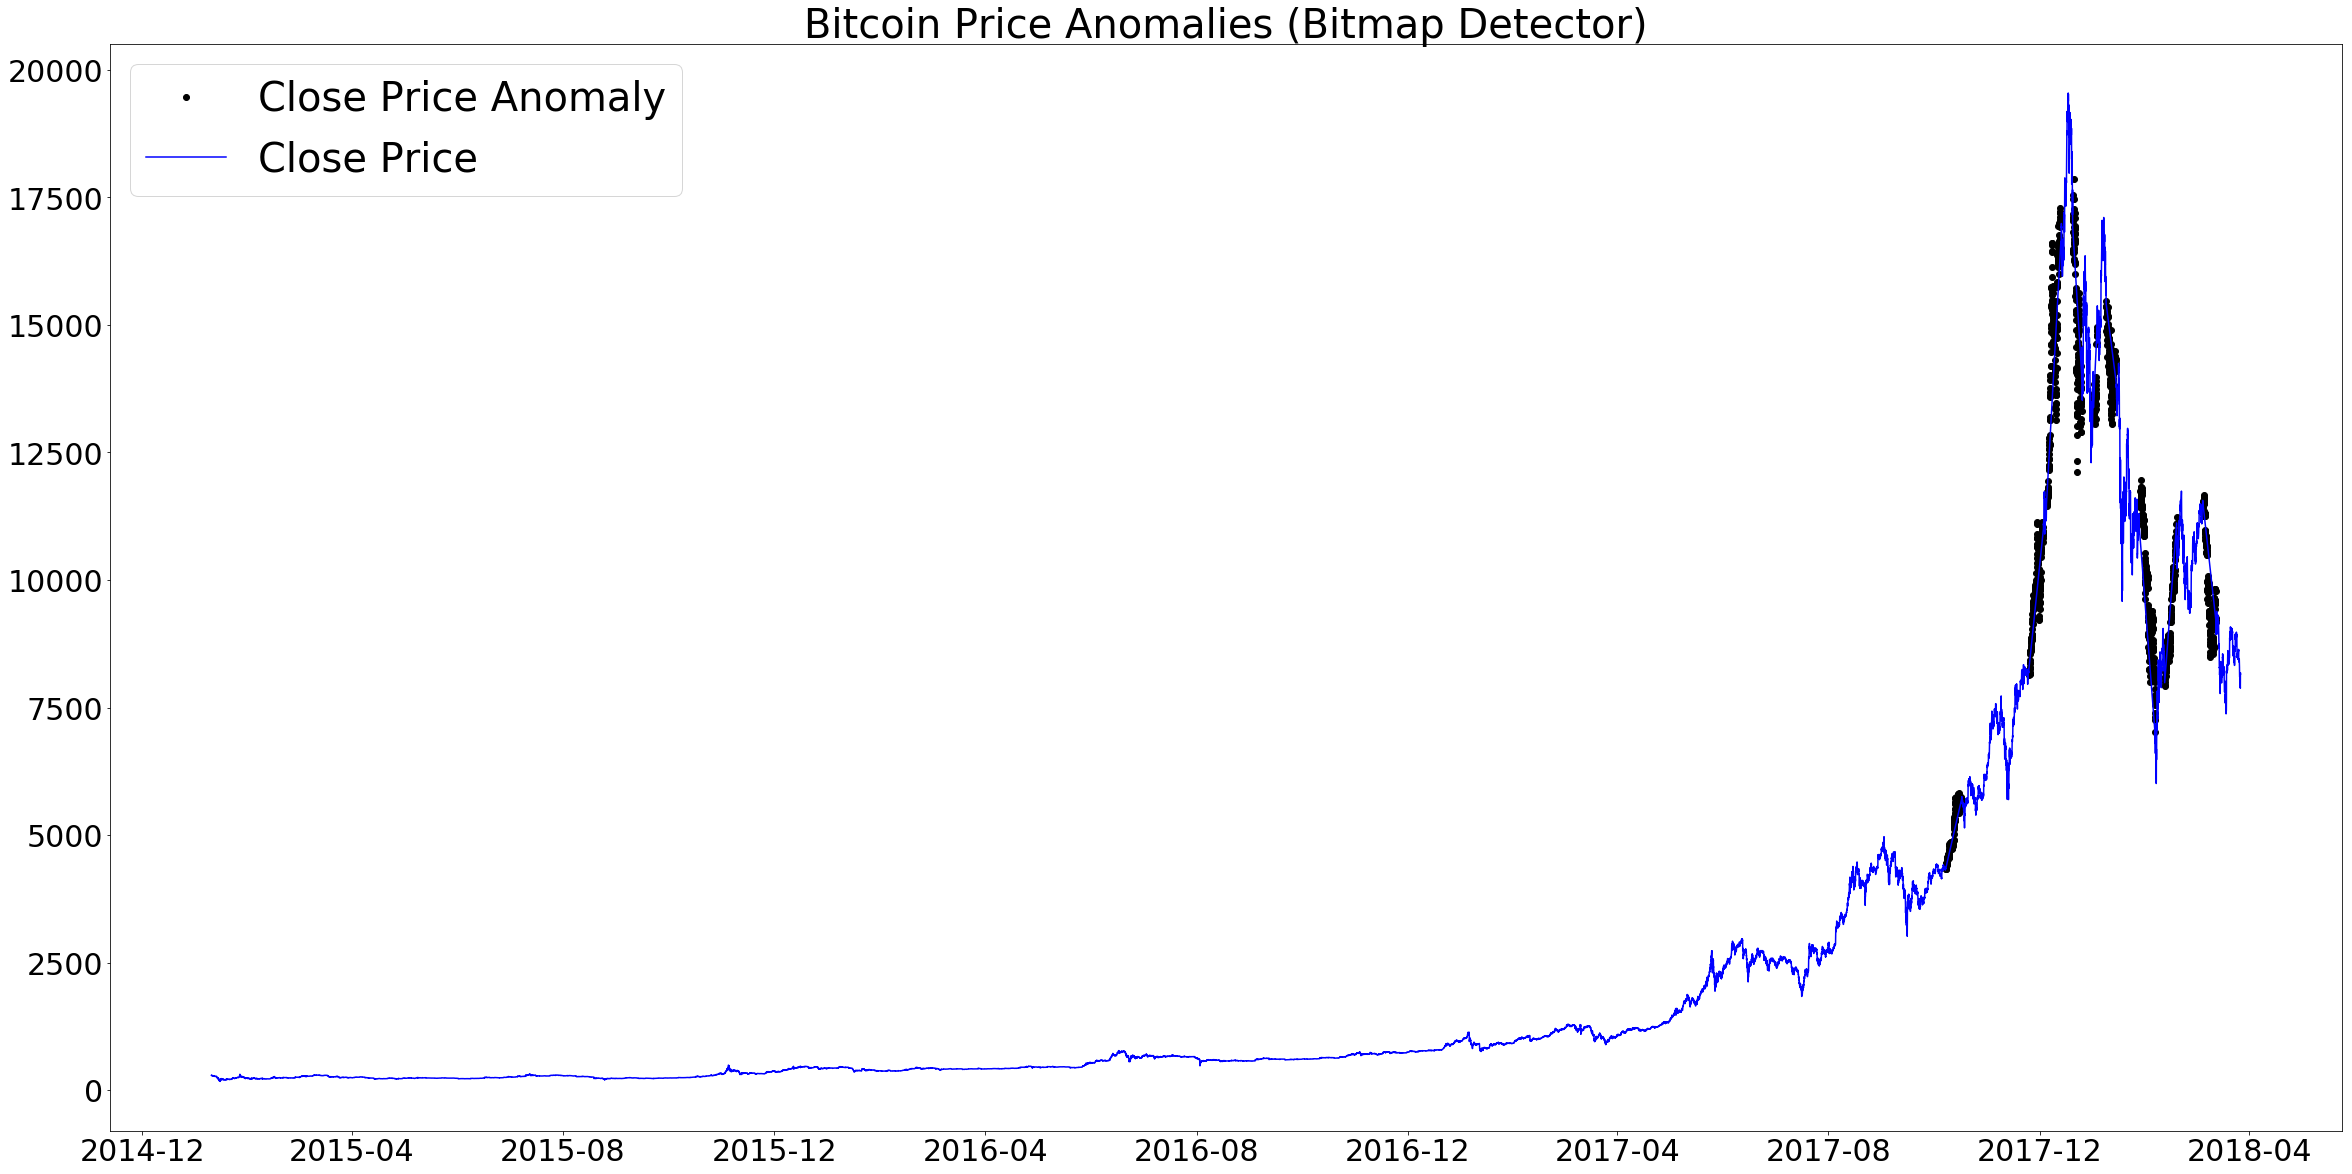

In [118]:
has_anomaly = btc_and_trends_df_hourly[btc_and_trends_df_hourly["Is Price Anomaly (Bitmap Detector)"] == 1]
no_anomaly = btc_and_trends_df_hourly[btc_and_trends_df_hourly["Is Price Anomaly (Bitmap Detector)"] == 0]

fig, ax = plt.subplots(figsize=(40,20))
l1, = ax.plot(has_anomaly["Date(UTC)"], has_anomaly["Close"],color='black', linestyle="None", marker='o')
l2, = ax.plot(no_anomaly["Date(UTC)"], no_anomaly["Close"], color="blue")
ax.set_title("Bitcoin Price Anomalies (Bitmap Detector)", fontsize=40)
for tick in ax.get_xticklabels():
    tick.set_fontsize(30)
for tick in ax.get_yticklabels():
    tick.set_fontsize(30)
plt.legend([l1, l2],["Close Price Anomaly", "Close Price"], fontsize=40)
plt.show() 


Note: Might need to explore other "anomaly detection" options, such as just simply calculating percent differences and deciding on a threshold to decide if something is anomaly or not 

In [119]:
# Find out when Google Trend (Overlap Adj.) data had anomalies 

# Convert dataframe into dictionary to put into luminol

# anomaly detector for google trends
trend_anomaly_detector = AnomalyDetector(timestamp_bitcoin_trend_overlap_dict)
score_trend = trend_anomaly_detector.get_all_scores()

btc_and_trends_df_hourly["Is Trend Anomaly (Bitmap Detector)"] = 0

trend_anomaly_df = pd.DataFrame(columns=['Timestamp', 'Date', 'Anomaly Score'])

for timestamp, value in score_trend.iteritems():
    # print anomaly score if greater than 0 
    readable_date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H')
    #display( str(readable_date) + '->' + str(value))
    anomaly_df = anomaly_df.append({'Timestamp':timestamp, 'Date': readable_date, 'Anomaly Score': value}, ignore_index=True)
    
trend_anomalies = trend_anomaly_detector.get_anomalies()
for anomaly in anomalies:
    time_period = anomaly.get_time_window()
    
    start, end = time_period
    is_in_period = (btc_and_trends_df_hourly["Timestamp"] > start) & (btc_and_trends_df_hourly["Timestamp"] < end)
    btc_and_trends_df_hourly.loc[is_in_period, "Is Price Anomaly (Bitmap Detector)"] = 1 
    
    # to do: tweek the parameters for correlator (like the shift allowed)
    correlator_historical = Correlator(timestamp_bitcoin_trend_overlap_dict ,timestamp_close_dict, time_period, algorithm_name='cross_correlator', algorithm_params= {'max_shift_seconds':86400})
    if correlator_historical.is_correlated(threshold=0.5):
        display("Trend data (Historical Adj.) correlate with Price at time period (%d, %d)" % time_period)
    
display('There were '+ str(len(anomalies))+ ' anomalies in the Timeseries Bitcoin Trend (Overlap Adj.) data ')

display(anomaly_df.head())

'Trend data (Historical Adj.) correlate with Price at time period (1507399200, 1508191200)'

'Trend data (Historical Adj.) correlate with Price at time period (1511550000, 1512273600)'

'Trend data (Historical Adj.) correlate with Price at time period (1512424800, 1513144800)'

'Trend data (Historical Adj.) correlate with Price at time period (1514775600, 1514952000)'

'There were 9 anomalies in the Timeseries Bitcoin Trend (Overlap Adj.) data '

Timestamp           Date  Anomaly Score
0  1420840800  2015-01-09 17            0.0
1  1420844400  2015-01-09 18            0.0
2  1420848000  2015-01-09 19            0.0
3  1420851600  2015-01-09 20            0.0
4  1420855200  2015-01-09 21            0.0

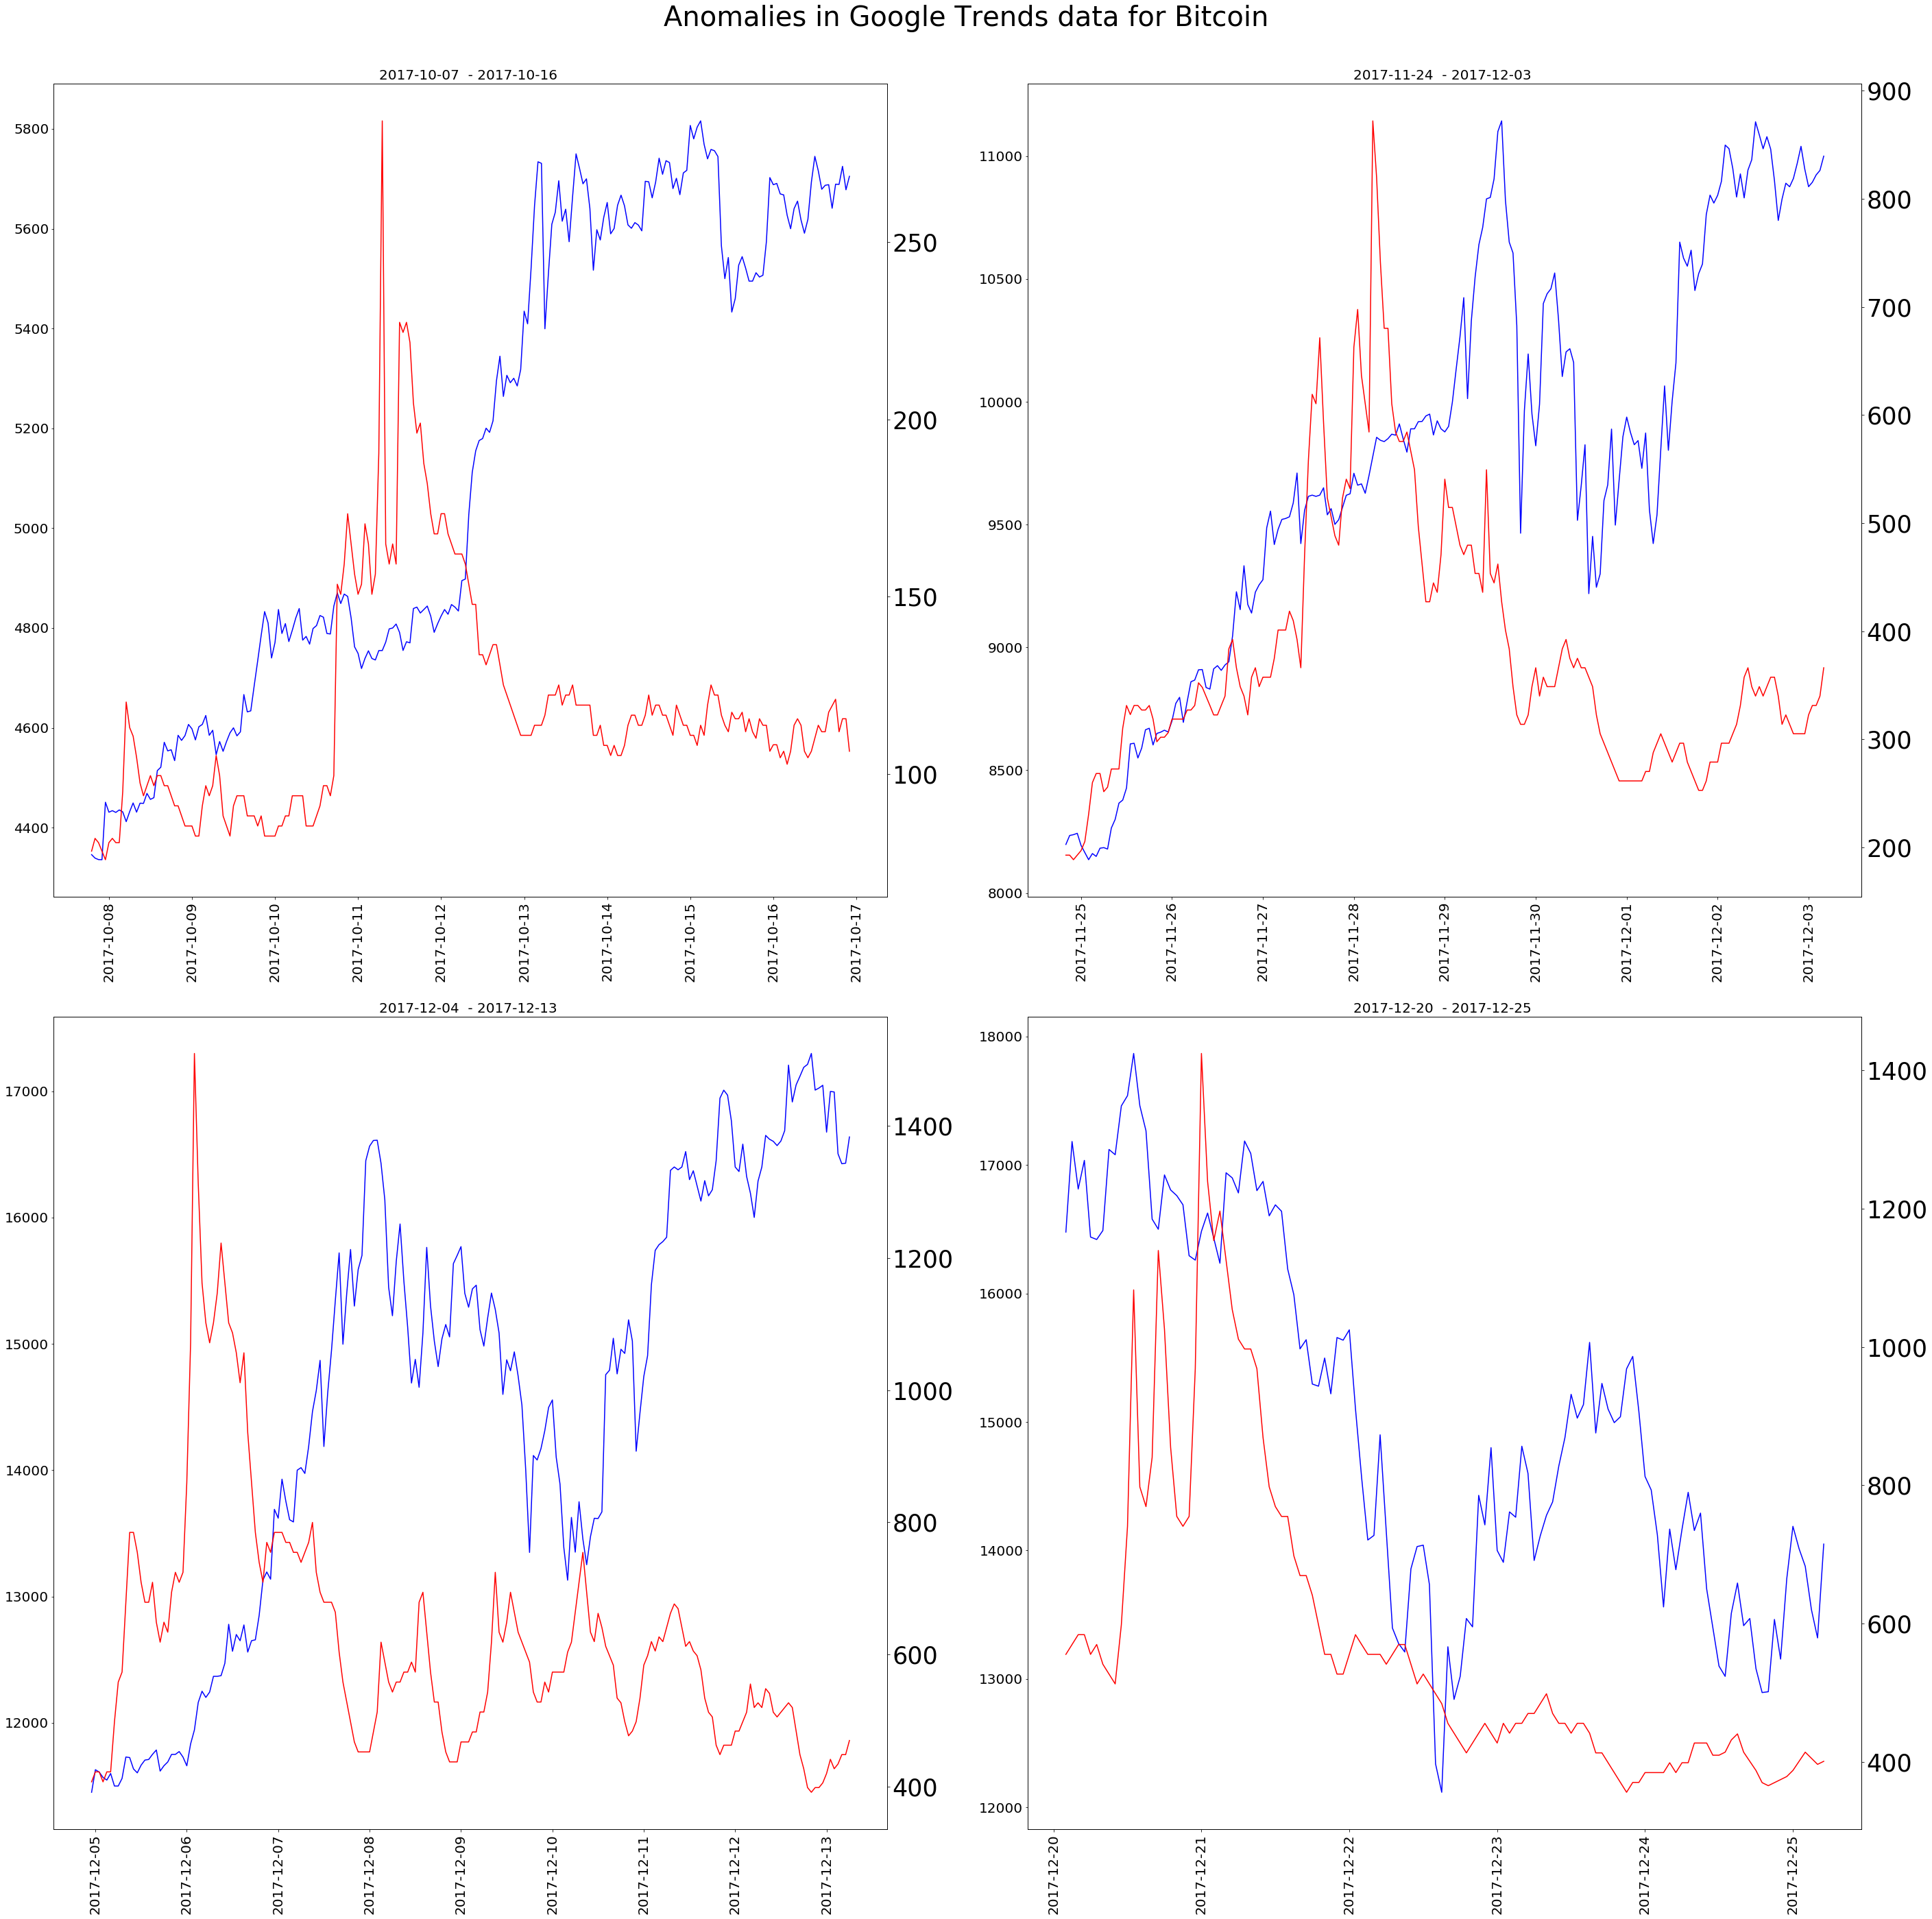

In [120]:
fig3, axes3 = plt.subplots(nrows=2, ncols=2, figsize=(40,40), sharex=False, sharey=False)

#for i, anomaly in enumerate(anomalies):
for i, ax in enumerate(axes3.flatten()):    
    time_period = anomalies[i].get_time_window()
    start_timestamp = time_period[0]
    end_timestamp = time_period[1] 
        
    in_range_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly["Timestamp"] <= end_timestamp) ]
    #display(in_range_df)
    ax.plot(in_range_df["Date(UTC)"], in_range_df["Close"], color='blue')
       
    ax2 = ax.twinx()
    ax2.plot(in_range_df['Date(UTC)'], in_range_df["Bitcoin (Adj.Overlap)"], color='red')
    
    ax.set_title(str(in_range_df["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(in_range_df["Date(UTC)"].iloc[-1])[:-8], fontsize=20 )
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(20)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(20)
fig3.suptitle("Anomalies in Google Trends data for Bitcoin", fontsize=40)
fig3.tight_layout()
#fig3.subplots_adjust(hspace=2)
fig3.subplots_adjust(top=0.94)
plt.show();

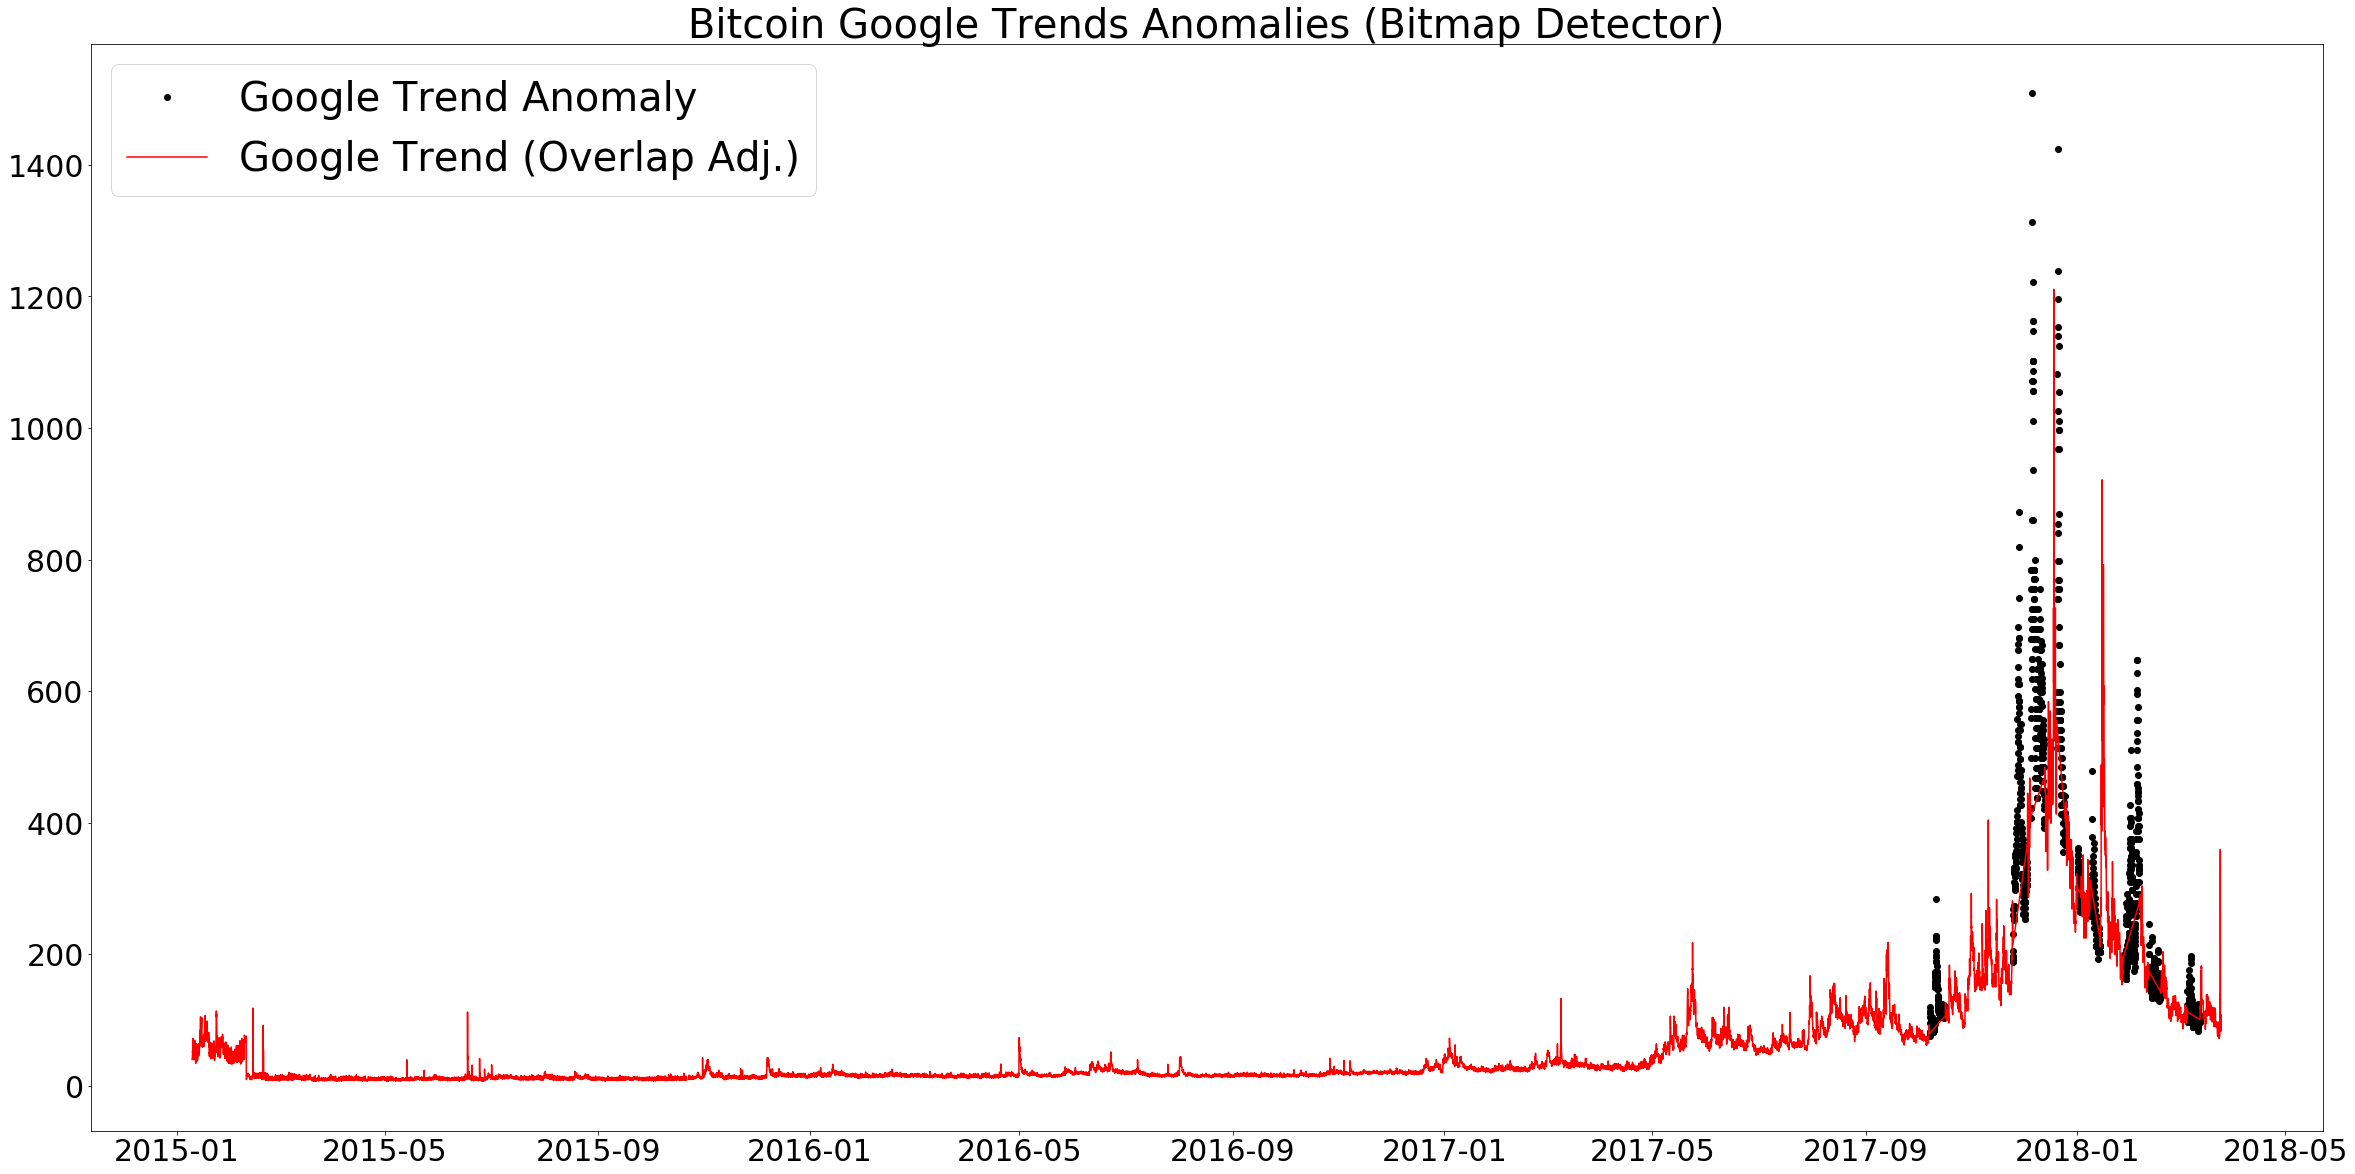

In [121]:
has_trend_anomaly = btc_and_trends_df_hourly[btc_and_trends_df_hourly["Is Trend Anomaly (Bitmap Detector)"] == 1]
no_trend_anomaly = btc_and_trends_df_hourly[btc_and_trends_df_hourly["Is Trend Anomaly (Bitmap Detector)"] == 0]

fig, ax = plt.subplots(figsize=(40,20))
l1, = ax.plot(has_anomaly["Date(UTC)"], has_anomaly["Bitcoin (Adj.Overlap)"],color='black', linestyle="None", marker='o')
l2, = ax.plot(no_anomaly["Date(UTC)"], no_anomaly["Bitcoin (Adj.Overlap)"], color="red")
ax.set_title("Bitcoin Google Trends Anomalies (Bitmap Detector)", fontsize=40)
for tick in ax.get_xticklabels():
    tick.set_fontsize(30)
for tick in ax.get_yticklabels():
    tick.set_fontsize(30)
plt.legend([l1, l2],["Google Trend Anomaly", "Google Trend (Overlap Adj.)"], fontsize=40)
plt.show() 

With a Percentile threshold of 0.900000, the cutoff value is 0.007147


Timestamp    Open    High     Low   Close  Volume_(BTC)  \
5   1420858800  286.66  286.98  286.65  286.70    501.942237   
11  1420880400  280.00  280.00  279.11  279.55     12.271850   
12  1420884000  280.11  280.58  279.60  279.60     14.809935   
43  1420995600  272.97  272.97  272.97  272.97      0.039084   
44  1420999200  271.10  271.10  271.10  271.10      5.713943   

    Volume_(Currency)  Weighted_Price           Date(UTC)                date  \
5       143886.762160      286.660001 2015-01-10 03:00:00 2015-01-09 17:00:00   
11        3429.780674      279.483598 2015-01-10 09:00:00 2015-01-09 23:00:00   
12        4141.657688      279.654017 2015-01-10 10:00:00 2015-01-10 00:00:00   
43          10.668702      272.970000 2015-01-11 17:00:00 2015-01-11 07:00:00   
44        1549.049958      271.100000 2015-01-11 18:00:00 2015-01-11 08:00:00   

             ...             isPartial            Date_UTC_trend  \
5            ...                 False 2015-01-09 22:00:00+00:00   
11           ...                 False 2015-01-10 04:00:00+00:00   
12           ...                 False 2015-01-10 05:00:00+00:00   
43           ...                 False 2015-01-11 12:00:00+00:00   
44           ...                 False 2015-01-11 13:00:00+00:00   

    Bitcoin (Adj.)  Bitcoin (Adj.Overlap)  Is Price Anomaly (Bitmap Detector)  \
5            132.5                   53.0                                   0   
11           155.0                   62.0                                   0   
12           150.0                   60.0                                   0   
43           115.0                   46.0                                   0   
44           102.5                   41.0                                   0   

    Is Price Anomaly (Derivative Detector) Is Trend Anomaly (Bitmap Detector)  \
5                                        0                                  0   
11                                       0                                  0   
12                                       0                                  0   
43                                       0                                  0   
44                                       0                                  0   

    Moving Average Price  Moving Average Price % Change  \
5             288.130000                      -0.008249   
11            284.016667                      -0.010533   
12            281.650000                      -0.008333   
43            275.166667                      -0.007443   
44            272.156667                      -0.010939   

    MA % Change (Abs.Value)  
5                  0.008249  
11                 0.010533  
12                 0.008333  
43                 0.007443  
44                 0.010939  

[5 rows x 25 columns]

There are 2813 rows above threshold


Timestamp     Open     High      Low    Close  Volume_(BTC)  \
28126  1522094400  7919.99  7920.00  7919.99  7919.99      0.617525   
28127  1522098000  7893.79  7893.79  7888.00  7890.00      2.717707   
28128  1522101600  7887.99  7891.22  7875.76  7879.00      1.141183   
28129  1522105200  8183.25  8192.80  8180.00  8181.23      1.937155   
28130  1522108800  8152.26  8164.68  8151.37  8153.04     17.758130   

       Volume_(Currency)  Weighted_Price           Date(UTC)  \
28126        4890.795926     7919.999335 2018-03-26 20:00:00   
28127       21444.807123     7890.772012 2018-03-26 21:00:00   
28128        9004.457981     7890.459201 2018-03-26 22:00:00   
28129       15856.422940     8185.418647 2018-03-26 23:00:00   
28130      144820.147410     8155.146220 2018-03-27 00:00:00   

                     date           ...             isPartial  \
28126 2018-03-26 10:00:00           ...                 False   
28127 2018-03-26 11:00:00           ...                 False   
28128 2018-03-26 12:00:00           ...                 False   
28129 2018-03-26 13:00:00           ...                 False   
28130 2018-03-26 14:00:00           ...                 False   

                 Date_UTC_trend  Bitcoin (Adj.)  Bitcoin (Adj.Overlap)  \
28126 2018-03-26 15:00:00+00:00           468.0                    NaN   
28127 2018-03-26 16:00:00+00:00           540.0                    NaN   
28128 2018-03-26 17:00:00+00:00           540.0                    NaN   
28129 2018-03-26 18:00:00+00:00           522.0                    NaN   
28130 2018-03-26 19:00:00+00:00           540.0                    NaN   

       Is Price Anomaly (Bitmap Detector)  \
28126                                   0   
28127                                   0   
28128                                   0   
28129                                   0   
28130                                   0   

       Is Price Anomaly (Derivative Detector)  \
28126                                       0   
28127                                       0   
28128                                       0   
28129                                       0   
28130                                       0   

      Is Trend Anomaly (Bitmap Detector)  Moving Average Price  \
28126                                  0           7922.190000   
28127                                  0           7904.856667   
28128                                  0           7896.330000   
28129                                  0           7983.410000   
28130                                  0           8071.090000   

       Moving Average Price % Change  MA % Change (Abs.Value)  
28126                      -0.006538                 0.006538  
28127                      -0.002188                 0.002188  
28128                      -0.001079                 0.001079  
28129                       0.011028                 0.011028  
28130                       0.010983                 0.010983  

[5 rows x 25 columns]

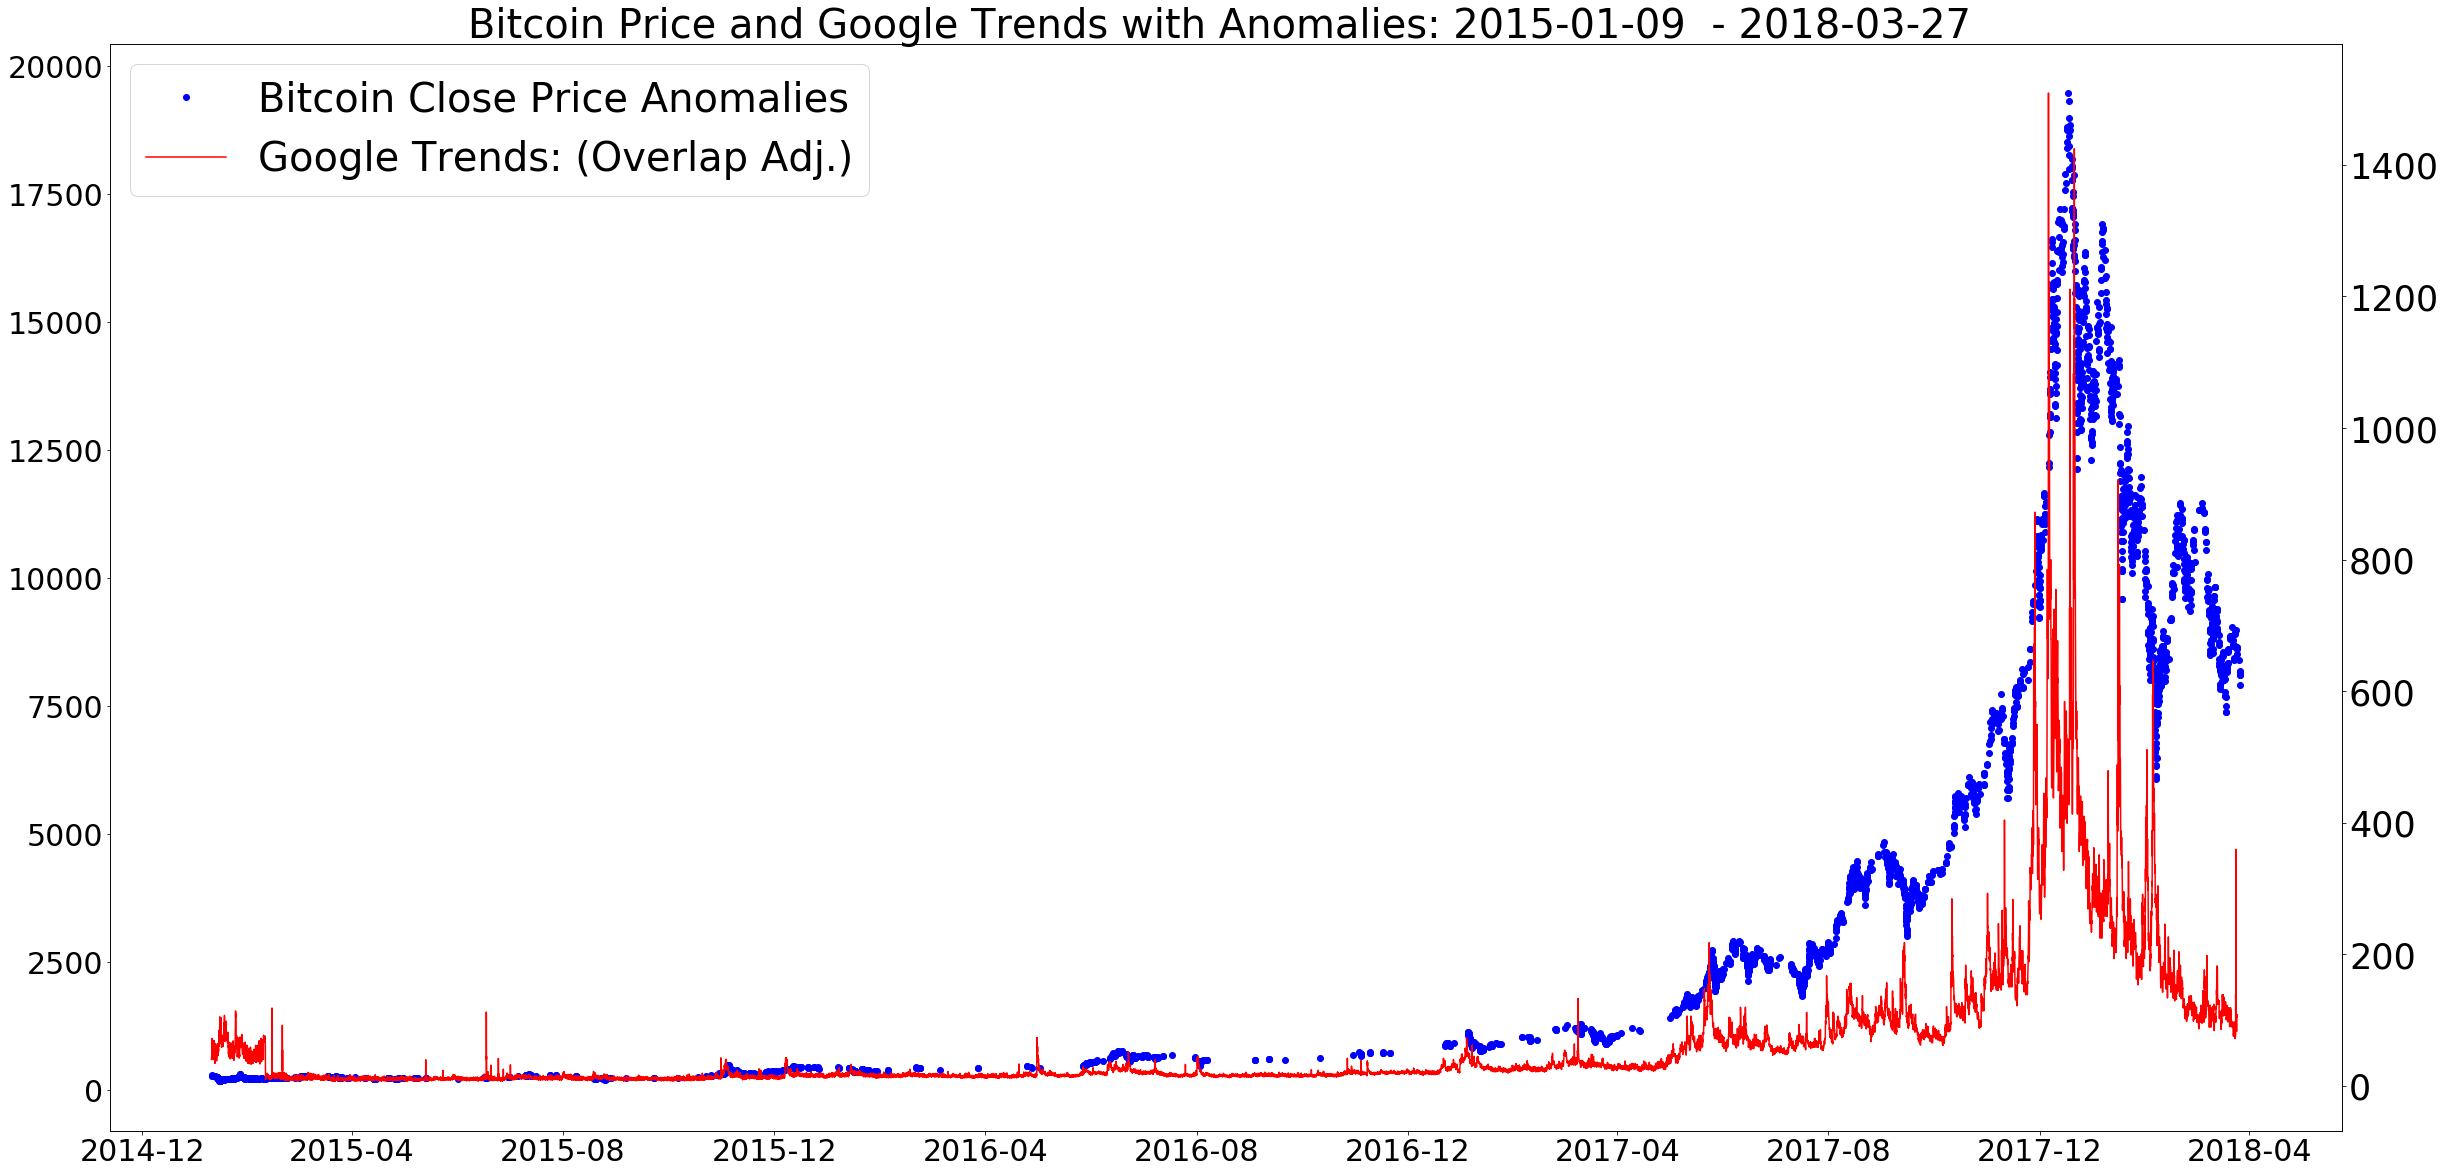

In [122]:
# Approach Anomaly Detection in a simple percent change approach 

MOVING_WINDOW_SIZE = 3

btc_and_trends_df_hourly['Moving Average Price'] = btc_and_trends_df_hourly["Close"].rolling(window=MOVING_WINDOW_SIZE).mean()
btc_and_trends_df_hourly["Moving Average Price % Change"] = btc_and_trends_df_hourly["Moving Average Price"].pct_change()
btc_and_trends_df_hourly["MA % Change (Abs.Value)"] = btc_and_trends_df_hourly["Moving Average Price % Change"].abs() 

THRESHOLD_PERCENTILE = 0.9 

threshold_cutoff_value = btc_and_trends_df_hourly["MA % Change (Abs.Value)"].quantile(THRESHOLD_PERCENTILE)
print('With a Percentile threshold of %f, the cutoff value is %f' %(THRESHOLD_PERCENTILE, threshold_cutoff_value) )

above_threshold_df = btc_and_trends_df_hourly[btc_and_trends_df_hourly["MA % Change (Abs.Value)"] >= threshold_cutoff_value]
display(above_threshold_df.head())
print('There are %i rows above threshold' % (len(above_threshold_df)))
display(btc_and_trends_df_hourly.tail())


# Graph it 
fig, ax = plt.subplots(figsize=(40,20)) 
l1, = ax.plot(above_threshold_df["Date(UTC)"], above_threshold_df["Close"], color='blue',linestyle="None", marker='o')
#l2, = ax.plot(btc_and_trends_df_hourly["Date(UTC)"], btc_and_trends_df_hourly["Close"], color='#aad6cc')

ax2 = ax.twinx() 
l3, = ax2.plot(btc_and_trends_df_hourly["Date(UTC)"], btc_and_trends_df_hourly["Bitcoin (Adj.Overlap)"], color='red' )

ax.set_title('Bitcoin Price and Google Trends with Anomalies: ' + str(btc_and_trends_df_hourly["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(btc_and_trends_df_hourly["Date(UTC)"].iloc[-1])[:-8], fontsize=40 )
for tick in ax.get_xticklabels():
    tick.set_fontsize(30)
for tick in ax.get_yticklabels():
    tick.set_fontsize(30)  

#plt.legend([l1, l2, l3],["Bitcoin Close Price Anomalies", "Bitcoin Close Price ", "Google Trends: (Overlap Adj.)"], fontsize=40)
plt.legend([l1, l3],["Bitcoin Close Price Anomalies", "Google Trends: (Overlap Adj.)"], fontsize=40)

plt.show();



In [123]:
# correlation

corr_close_and_overlap = btc_and_trends_df_hourly["Close"].corr(btc_and_trends_df_hourly["Bitcoin (Adj.)"])
corr_close_and_historical = btc_and_trends_df_hourly["Close"].corr(btc_and_trends_df_hourly["Bitcoin (Adj.Overlap)"])

print('Correlation between Close price and Trend (Overlap): ', corr_close_and_overlap)
print('Correlation between Close price and Trend (Historical): ', corr_close_and_historical)


Correlation between Close price and Trend (Overlap):  0.875279850279
Correlation between Close price and Trend (Historical):  0.861160032928


## Granger Causality

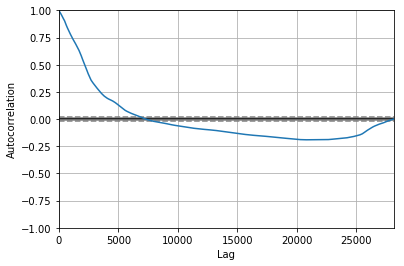

In [124]:
from pandas.plotting import autocorrelation_plot

# autocorrelation
plt.rcParams.update({'font.size':10})
autocorrelation_plot(btc_and_trends_df_hourly["Close"]);

In [139]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

# Process Data 
granger_df = btc_and_trends_df_hourly_overlap[["Close", "Bitcoin (Adj.Overlap)","Close Price % Change (Abs)" ]]
#granger_df.set_index("Timestamp", inplace=True)
granger_df = granger_df.dropna()
display(granger_df.head())

# turn data from non-stationary to stationary data

#data_matrix_array = np.diff(np.log(granger_df), axis=0)
data_matrix_array = np.diff(granger_df, axis=0)
data_matrix = pd.DataFrame(data_matrix_array, columns = ["Close", "Bitcoin (Adj.Overlap)","Close Price % Change (Abs)"])
print("Transformed Data")
display(data_matrix.head())


Close  Bitcoin (Adj.Overlap)  Close Price % Change (Abs)
1  292.15                   41.0                    0.010445
2  293.89                   43.0                    0.005956
3  289.10                   43.0                    0.016299
4  288.59                   45.0                    0.001764
5  286.70                   53.0                    0.006549

Transformed Data


Close  Bitcoin (Adj.Overlap)  Close Price % Change (Abs)
0   1.74                    2.0                   -0.004489
1  -4.79                    0.0                    0.010343
2  -0.51                    2.0                   -0.014535
3  -1.89                    8.0                    0.004785
4   1.67                   -1.0                   -0.000724

In [143]:
# Test if data is now stationary using Augmented Dickey-Fuller unit root test (Adfuller)
results = [] 
results.append(adfuller(granger_df["Close"].values))
results.append(adfuller(granger_df["Bitcoin (Adj.Overlap)"].values))
results.append(adfuller(granger_df["Close Price % Change (Abs)" ].values))
results.append(adfuller(data_matrix["Close"]))
results.append(adfuller(data_matrix["Bitcoin (Adj.Overlap)"]))
results.append(adfuller(data_matrix["Close Price % Change (Abs)" ]))
results_labels = ['Price with w/o difference', 'Bitcoin trend w/o difference', 'Close Price % Change (Abs) w/o difference',          
                  'Price with w/ difference', 'Bitcoin trend w/ difference', 'Close Price % Change (Abs) w/ difference']


for i, result in enumerate(results):
    print('-----------------------')
    print(results_labels[i])              
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print ("Close Prices and Bitcoin Trend Data are Converted to Stationary Data with 99% confidence")
        
granger_test_result = grangercausalitytests(data_matrix[["Close", "Bitcoin (Adj.Overlap)"]], 15)


-----------------------
Price with w/o difference
ADF Statistic: -0.963055
p-value: 0.766500
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.431
-----------------------
Bitcoin trend w/o difference
ADF Statistic: -4.818753
p-value: 0.000050
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.431
-----------------------
Close Price % Change (Abs) w/o difference
ADF Statistic: -10.564299
p-value: 0.000000
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.431
-----------------------
Price with w/ difference
ADF Statistic: -23.173210
p-value: 0.000000
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.431
-----------------------
Bitcoin trend w/ difference
ADF Statistic: -27.407893
p-value: 0.000000
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.431
-----------------------
Close Price % Change (Abs) w/ difference
ADF Statistic: -35.136438
p-value: 0.000000
Critical Values:
	5%: -2.862
	10%: -2.567
	1%: -3.431
Close Prices and Bitcoin Trend Data are Converted to Stationary Data with 99% c

In [144]:
# Now test if Close Prices Granger Causes Google Trends 

close_prices_stationary = data_matrix["Close"]
bitcoin_trends_stationary = data_matrix["Bitcoin (Adj.Overlap)"]
data_matrix_2 = np.column_stack(( bitcoin_trends_stationary, close_prices_stationary))
display(data_matrix_2)

granger_test_result = grangercausalitytests(data_matrix_2, 30)

array([[   2.        ,    1.74      ],
       [   0.        ,   -4.79      ],
       [   2.        ,   -0.51      ],
       ..., 
       [   0.        ,  -11.        ],
       [  -3.59184421,  302.23      ],
       [   3.59184421,  -28.19      ]])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=140.4558, p=0.0000  , df_denom=28035, df_num=1
ssr based chi2 test:   chi2=140.4708, p=0.0000  , df=1
likelihood ratio test: chi2=140.1201, p=0.0000  , df=1
parameter F test:         F=140.4558, p=0.0000  , df_denom=28035, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=80.3164 , p=0.0000  , df_denom=28032, df_num=2
ssr based chi2 test:   chi2=160.6614, p=0.0000  , df=2
likelihood ratio test: chi2=160.2028, p=0.0000  , df=2
parameter F test:         F=80.3164 , p=0.0000  , df_denom=28032, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=61.1633 , p=0.0000  , df_denom=28029, df_num=3
ssr based chi2 test:   chi2=183.5358, p=0.0000  , df=3
likelihood ratio test: chi2=182.9377, p=0.0000  , df=3
parameter F test:         F=61.1633 , p=0.0000  , df_denom=28029, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=52.0658 

ssr based F test:         F=83.3676 , p=0.0000  , df_denom=27954, df_num=28
ssr based chi2 test:   chi2=2339.0530, p=0.0000  , df=28
likelihood ratio test: chi2=2246.5095, p=0.0000  , df=28
parameter F test:         F=83.3676 , p=0.0000  , df_denom=27954, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=80.5268 , p=0.0000  , df_denom=27951, df_num=29
ssr based chi2 test:   chi2=2340.2069, p=0.0000  , df=29
likelihood ratio test: chi2=2247.5713, p=0.0000  , df=29
parameter F test:         F=80.5268 , p=0.0000  , df_denom=27951, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=78.0259 , p=0.0000  , df_denom=27948, df_num=30
ssr based chi2 test:   chi2=2345.8850, p=0.0000  , df=30
likelihood ratio test: chi2=2252.8079, p=0.0000  , df=30
parameter F test:         F=78.0259 , p=0.0000  , df_denom=27948, df_num=30


### Granger Causality Observations

#### If Google Trends Granger Causes Bitcoin Prices 

#### If Bitcoin Prices Granger Causes Google Trends 


## Structural VARs

Close  Bitcoin (Adj.Overlap)  Close Price % Change (Abs)
0   1.74                    2.0                   -0.004489
1  -4.79                    0.0                    0.010343
2  -0.51                    2.0                   -0.014535
3  -1.89                    8.0                    0.004785
4   1.67                   -1.0                   -0.000724

array([['1', 'E'],
       ['1', '1']],
      dtype='<U11')

array([['1', 'E'],
       ['1', '1']],
      dtype='<U11')

C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Tue, 12, Jun, 2018
Time:                     17:26:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.0613
Nobs:                     28038.0    HQIC:                   13.0601
Log likelihood:          -262645.    FPE:                    469572.
AIC:                      13.0596    Det(Omega_mle):         469472.
--------------------------------------------------------------------
Results for equation Close
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.294916         0.390972            0.754           0.451
L1.Close                        -0.051294         0.005965           -8.599           0.000
L1.Bitcoin (Adj.

Granger Causality: Close -> Google Trend
Granger causality F-test. H_0: Bitcoin (Adj.Overlap) does not Granger-cause Close. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
    4.625          3.842       0.032  (1, 56070)
------------------------------------------------
Instantaneous causality Wald-test. H_0: Bitcoin (Adj.Overlap) does not instantaneously cause Close. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    12.85          3.841       0.000  1 
----------------------------------------


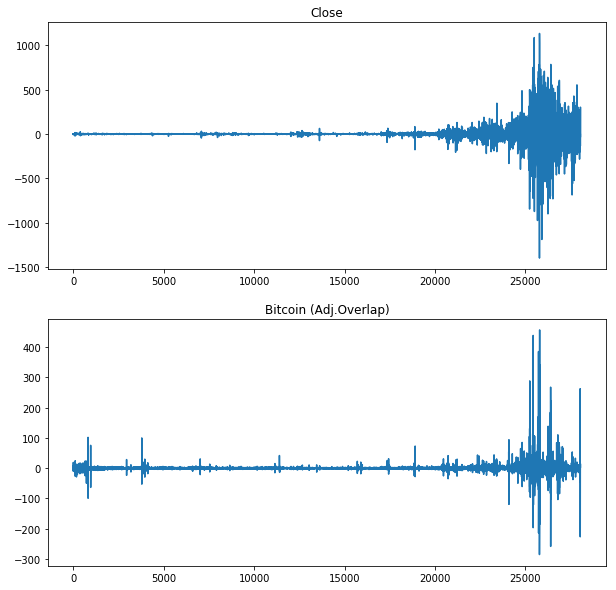

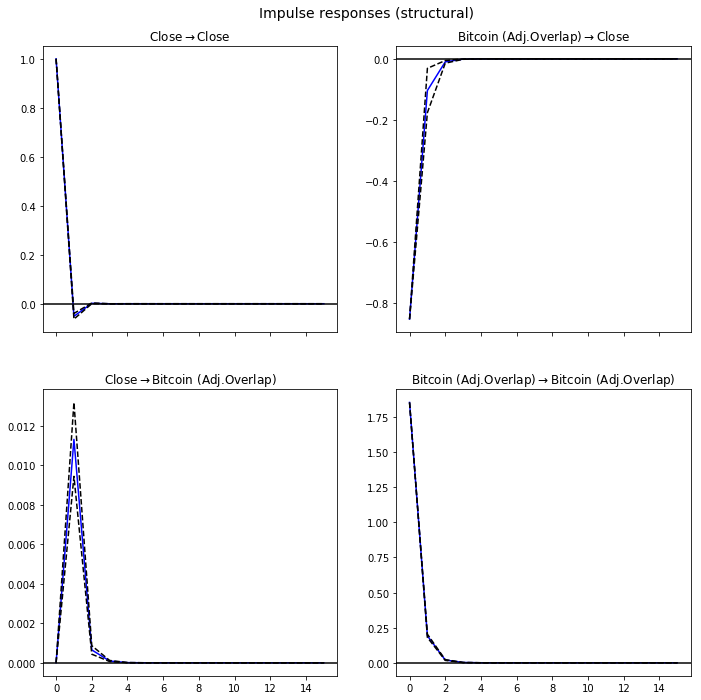

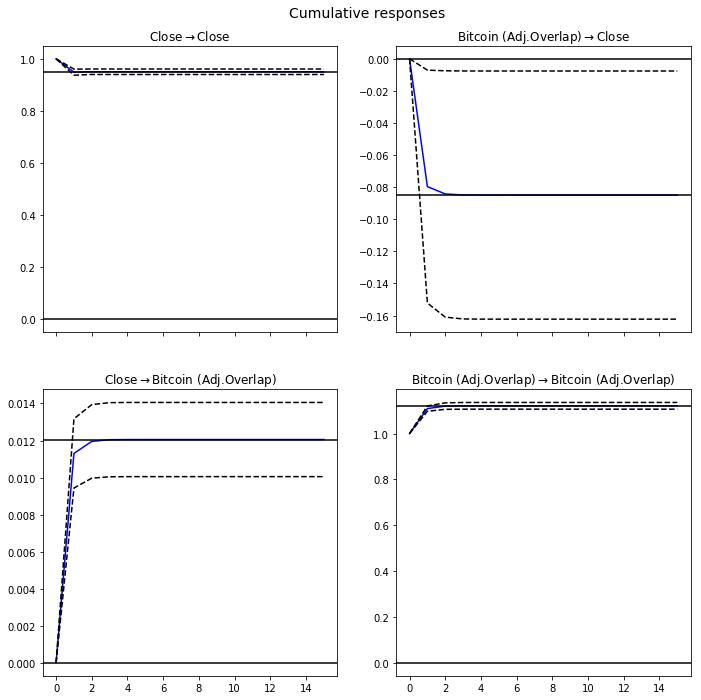

In [150]:
from statsmodels.tsa.api import SVAR 

A = np.array([[1, 'E'], 
              [1, 1]])

B = np.array([[1, 'E'], 
              [1, 1]])

display(data_matrix.head(), A, B )

# TODO: Look and tweak parameters 

SVAR_model = SVAR(data_matrix[["Close", "Bitcoin (Adj.Overlap)"]], svar_type='AB', A=A, B=B)
result_SVAR = SVAR_model.fit(verbose=True)
display(result_SVAR.summary())
result_SVAR.plot();
SVAR_irf = result_SVAR.irf(periods=15)
SVAR_irf.plot();
SVAR_irf.plot_cum_effects();

SVAR_granger_result = result_SVAR.test_causality('Close', 'Bitcoin (Adj.Overlap)', kind='f')
print('Granger Causality: Close -> Google Trend')
print(SVAR_granger_result.summary())
SVAR_instantaneous_causality_result = result_SVAR.test_inst_causality('Bitcoin (Adj.Overlap)')
print(SVAR_instantaneous_causality_result.summary())

In [148]:
# Test if Prices Granger Causes Trend 
SVAR_granger_result = result_SVAR.test_causality('Bitcoin (Adj.Overlap)', 'Close', kind='f')
print("Granger Causality: Google Trend -> Price")
print(SVAR_granger_result.summary())

Granger Causality: Google Trend -> Price
Granger causality F-test. H_0: Close does not Granger-cause Bitcoin (Adj.Overlap). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
    140.5          3.842       0.000  (1, 56070)
------------------------------------------------


In [154]:
# Run SVAR for price % change

SVAR_model_percent_change = SVAR(data_matrix[["Close Price % Change (Abs)", "Bitcoin (Adj.Overlap)"]], svar_type='AB', A=A, B=B)
percent_change_result_SVAR = SVAR_model_percent_change.fit(verbose=True, solver='nm')
# display(percent_change_result_SVAR.summary())
# percent_change_result_SVAR.plot();
# SVAR_irf_percent_change = percent_change_result_SVAR.irf(periods=15)
# SVAR_irf_percent_change.plot();
# SVAR_irf_percent_change.plot_cum_effects();

# SVAR_granger_percent_change_result = percent_change_result_SVAR.test_causality('Close Price % Change (Abs)', 'Bitcoin (Adj.Overlap)', kind='f')
# print('Granger Causality: Close Price % Change (Abs) -> Google Trend')
# print(SVAR_granger_percent_change_result.summary())
# SVAR_instantaneous_causality_percent_change_result = percent_change_result_SVAR.test_inst_causality('Bitcoin (Adj.Overlap)')
# print(SVAR_instantaneous_causality_percent_change_result.summary())

C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\vector_ar\svar_model.py:295: RuntimeWarning: invalid value encountered in double_scalars
  b_slogdet = sign * b_logdet
C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
